# Análise dos dados do Orçamento Cidadão de 2022

## Visualização inicial dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Ler o arquivo CSV
dataset_url = 'https://raw.githubusercontent.com/iwamotoraphael/participacao-politica/main/arquivos%20de%20dados/projeto-de-lei-orcamentaria-anual-2022.csv'
data = pd.read_csv(dataset_url, sep=',', on_bad_lines='skip')

In [3]:
# Visualizar as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(data.head())

Primeiras linhas do DataFrame:
   Código Data de criação                  Autor              Subprefeitura  \
0    3151      10/05/2021  Fernanda Imperio Lima           Pirituba/Jaraguá   
1     398      18/04/2021        Sandra Carvalho                Campo Limpo   
2    2587      02/05/2021    Vânia Luzia Cabrera  Vila Maria/Vila Guilherme   
3     324      17/04/2021               Pedro H.                Santo Amaro   
4    2081      02/05/2021         Simone Boacnin               Vila Mariana   

                                              Título  \
0                                               3151   
1  Implementação dos parques Horto do Ipê, Capadó...   
2                                               2587   
3  Criar um grande corredor verde em todo trecho ...   
4                                               2081   

                                           Descrição      Categoria  \
0  Viabilização do Parque Brasilandia Projeto de ...  Meio Ambiente   
1  Conforme o D

In [4]:
# Verificar as colunas do DataFrame
print("\nColunas do DataFrame:")
print(data.columns)


Colunas do DataFrame:
Index(['Código', 'Data de criação', 'Autor', 'Subprefeitura', 'Título',
       'Descrição', 'Categoria', 'Link da imagem', 'Documento 1',
       'Documento 2', 'Documento 3', 'Quantidade de apoios',
       'Resultado da priorização', 'Votos', 'Resultado da votação',
       'Viabilidade', 'Compromisso', 'Justificativa',
       'Órgão público responsável (1)', 'Ações orçamentárias (1)',
       'Número do processo SEI (1)', 'Viabilidade técnica (1)',
       'Parecer técnico (1)', 'Viabilidade jurídica (1)',
       'Parecer jurídico (1)', 'Viabilidade orçamentária (1)',
       'Parecer orçamentário (1)'],
      dtype='object')


In [5]:
# Informações gerais sobre o DataFrame
print("\nInformações gerais do DataFrame:")
print(data.info())


Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Código                         3129 non-null   int64 
 1   Data de criação                3129 non-null   object
 2   Autor                          3084 non-null   object
 3   Subprefeitura                  3129 non-null   object
 4   Título                         3129 non-null   object
 5   Descrição                      3129 non-null   object
 6   Categoria                      3129 non-null   object
 7   Link da imagem                 590 non-null    object
 8   Documento 1                    249 non-null    object
 9   Documento 2                    11 non-null     object
 10  Documento 3                    2 non-null      object
 11  Quantidade de apoios           3129 non-null   int64 
 12  Resultado da priorização    

In [6]:
# Estatísticas descritivas das colunas numéricas
print("\nEstatísticas descritivas:")
print(data.describe())


Estatísticas descritivas:
            Código  Quantidade de apoios        Votos
count  3129.000000                3129.0  3129.000000
mean   1588.904762                   0.0     7.842442
std     910.166104                   0.0    38.173966
min       1.000000                   0.0     0.000000
25%     803.000000                   0.0     0.000000
50%    1594.000000                   0.0     0.000000
75%    2377.000000                   0.0     0.000000
max    3160.000000                   0.0  1072.000000


In [7]:
# Colunas a serem removidas
colunas_remover = ['Data de criação', 'Autor', 'Link da imagem', 'Documento 1',
                   'Documento 2', 'Documento 3', 'Ações orçamentárias (1)',
                   'Número do processo SEI (1)', 'Viabilidade técnica (1)',
                   'Parecer técnico (1)', 'Viabilidade jurídica (1)',
                   'Parecer jurídico (1)', 'Viabilidade orçamentária (1)',
                   'Parecer orçamentário (1)']

# Remover as colunas
data = data.drop(columns=colunas_remover)

# Visualizar as primeiras linhas do DataFrame após a remoção
print("Primeiras linhas do DataFrame após a remoção:")
print(data.head())

Primeiras linhas do DataFrame após a remoção:
   Código              Subprefeitura  \
0    3151           Pirituba/Jaraguá   
1     398                Campo Limpo   
2    2587  Vila Maria/Vila Guilherme   
3     324                Santo Amaro   
4    2081               Vila Mariana   

                                              Título  \
0                                               3151   
1  Implementação dos parques Horto do Ipê, Capadó...   
2                                               2587   
3  Criar um grande corredor verde em todo trecho ...   
4                                               2081   

                                           Descrição      Categoria  \
0  Viabilização do Parque Brasilandia Projeto de ...  Meio Ambiente   
1  Conforme o Decreto 53.965/2013 que declara a á...  Meio Ambiente   
2  Monitorar o estado nutricional da população at...          Saúde   
3  Criar um grande corredor verde em todo trecho ...  Meio Ambiente   
4  A Associação Viva 

In [8]:
# Contar o número total de propostas e propostas eleitas
total_propostas = len(data)
eleitas = sum(data['Resultado da votação'] == 'Eleita')

# Calcular a proporção de propostas eleitas em relação ao total
proporcao_eleitas = eleitas / total_propostas

print("Número total de propostas:", total_propostas)
print("Número de propostas eleitas:", eleitas)
print("Proporção de propostas eleitas:", proporcao_eleitas)

Número total de propostas: 3129
Número de propostas eleitas: 161
Proporção de propostas eleitas: 0.05145413870246085


In [9]:
# Calcular o número de propostas consideradas viáveis após serem eleitas
eleitas_viaveis = sum(data[data['Resultado da votação'] == 'Eleita']['Viabilidade'] == 'Viável')
proporcao_eleitas_viaveis = eleitas_viaveis / eleitas

print("Número de propostas consideradas viáveis após eleitas:", eleitas_viaveis)
print("Proporção de propostas consideradas viáveis após eleitas:", proporcao_eleitas_viaveis)

Número de propostas consideradas viáveis após eleitas: 84
Proporção de propostas consideradas viáveis após eleitas: 0.5217391304347826


## Análise geral por subprefeitura

### Número de propostas

In [10]:
# Contar o número de subprefeituras únicas
num_subprefeituras = data['Subprefeitura'].nunique()

# Exibir o número de subprefeituras
print("Número de subprefeituras:", num_subprefeituras)

Número de subprefeituras: 32


In [11]:
# Contar o número de propostas por Subprefeitura
propostas_por_subprefeitura = data['Subprefeitura'].value_counts().reset_index()
propostas_por_subprefeitura.columns = ['Subprefeitura', 'Total de Propostas']
propostas_por_subprefeitura.sort_values(by='Total de Propostas', ascending=False)

# Exibir a contagem de propostas por Subprefeitura
print("Contagem de propostas por Subprefeitura:")
print(propostas_por_subprefeitura)

Contagem de propostas por Subprefeitura:
                Subprefeitura  Total de Propostas
0                  São Mateus                 206
1                  Casa Verde                 203
2                     Butantã                 183
3   Vila Maria/Vila Guilherme                 165
4   Aricanduva/Formosa/Carrão                 139
5                 Campo Limpo                 133
6              Itaim Paulista                 129
7                       Perus                 114
8                 Santo Amaro                 111
9                 Parelheiros                 108
10               Vila Mariana                 107
11                  Sapopemba                 106
12                   Itaquera                 106
13                  Jabaquara                 103
14                      Penha                  99
15                M'Boi Mirim                  95
16          Capela do Socorro                  94
17                   Ipiranga                  92
18       

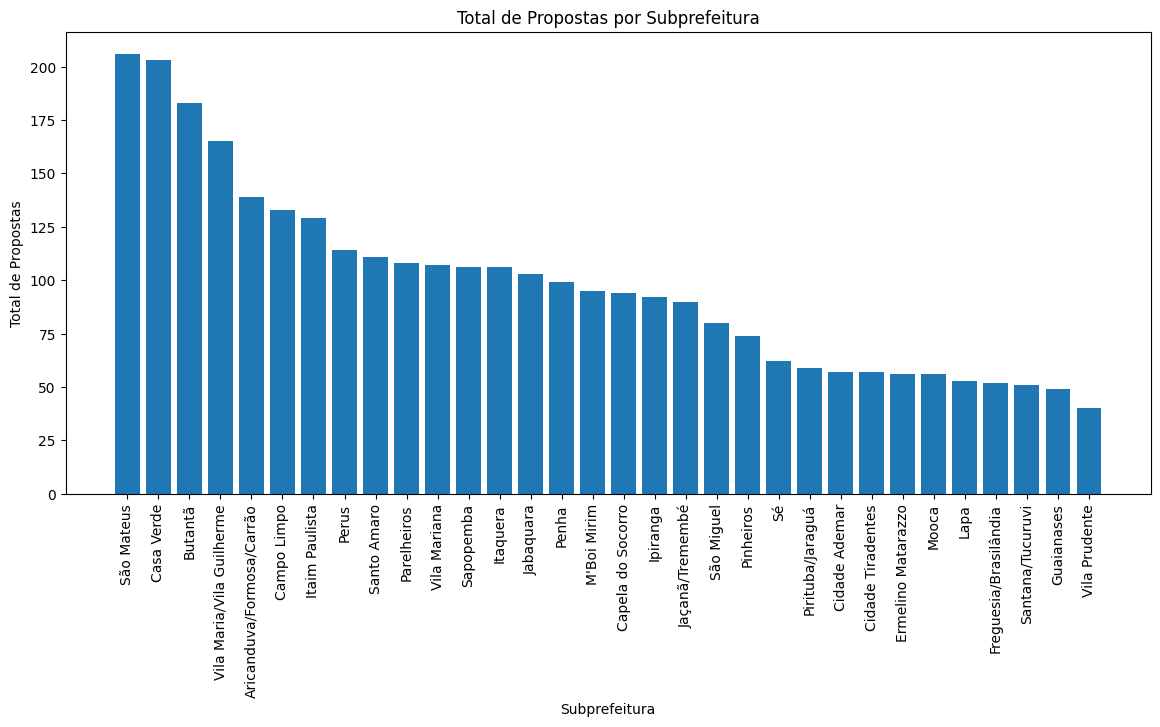

In [12]:
# Plotar o gráfico de barras Subprefeitura x Total de Propostas
plt.figure(figsize=(14, 6))
plt.bar(propostas_por_subprefeitura['Subprefeitura'], propostas_por_subprefeitura['Total de Propostas'])
plt.xlabel('Subprefeitura')
plt.ylabel('Total de Propostas')
plt.title('Total de Propostas por Subprefeitura')
plt.xticks(rotation=90)
plt.show()

### Categoria mais predominante

In [13]:
categorias_por_subprefeitura = data.groupby('Subprefeitura')['Categoria'].agg(lambda x: x.value_counts().index[0])
print(categorias_por_subprefeitura)

Subprefeitura
Aricanduva/Formosa/Carrão                                     Saúde
Butantã                      Zeladoria Urbana e melhorias de bairro
Campo Limpo                  Zeladoria Urbana e melhorias de bairro
Capela do Socorro                      Direitos Humanos e Cidadania
Casa Verde                                                    Saúde
Cidade Ademar                                          Outros temas
Cidade Tiradentes                          Transportes e mobilidade
Ermelino Matarazzo             Desenvolvimento Econômico e Trabalho
Freguesia/Brasilândia                                  Outros temas
Guaianases                                      Segurança Alimentar
Ipiranga                                        Segurança Alimentar
Itaim Paulista                                                Saúde
Itaquera                     Zeladoria Urbana e melhorias de bairro
Jabaquara                                       Segurança Alimentar
Jaçanã/Tremembé              Zelad

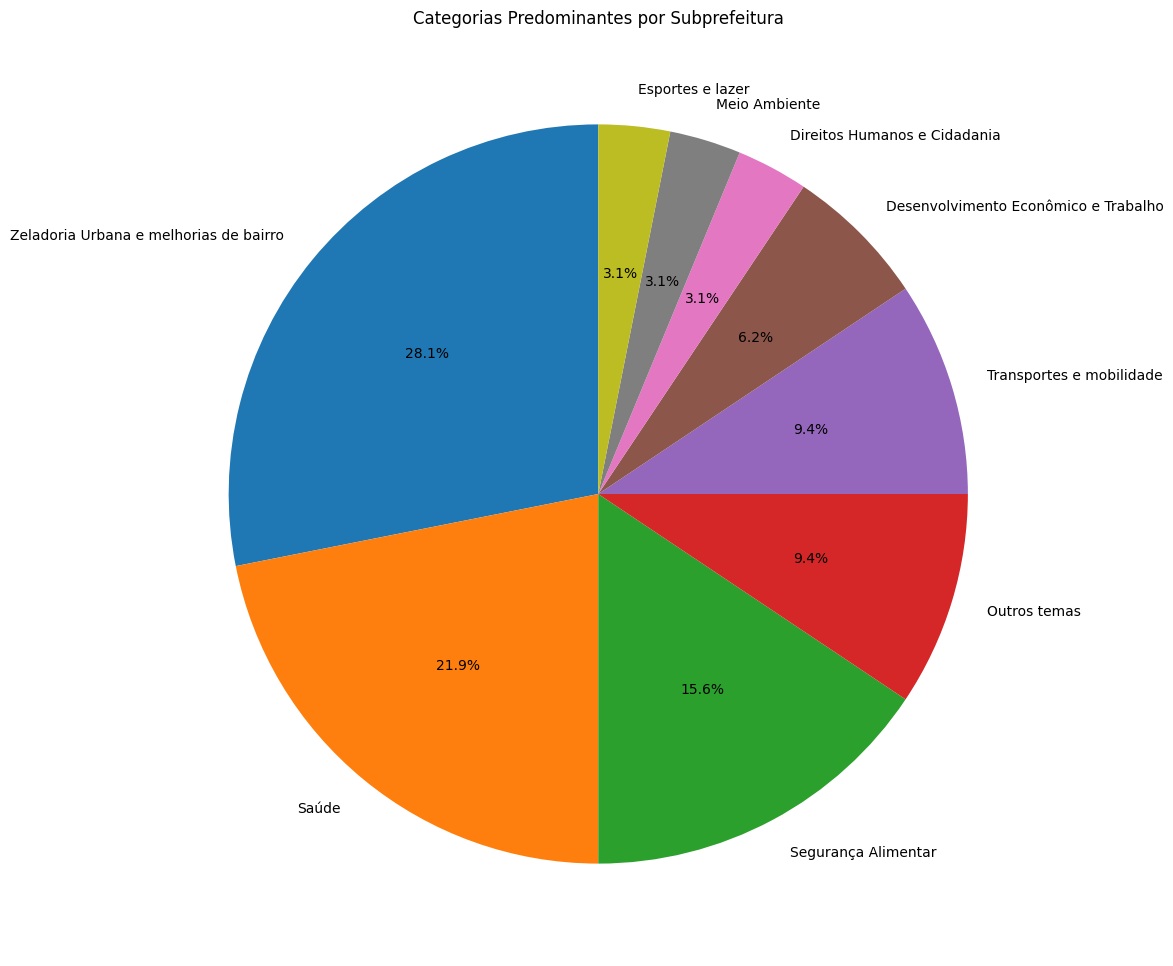

In [14]:
# Categorias por subprefeitura
categorias_por_subprefeitura = data.groupby('Subprefeitura')['Categoria'].agg(lambda x: x.value_counts().index[0])

# Contagem das categorias
contagem_categorias = categorias_por_subprefeitura.value_counts()

# Configurações do gráfico
plt.figure(figsize=(17, 12))
plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', startangle=90)
plt.title('Categorias Predominantes por Subprefeitura')

# Exibição do gráfico
plt.show()

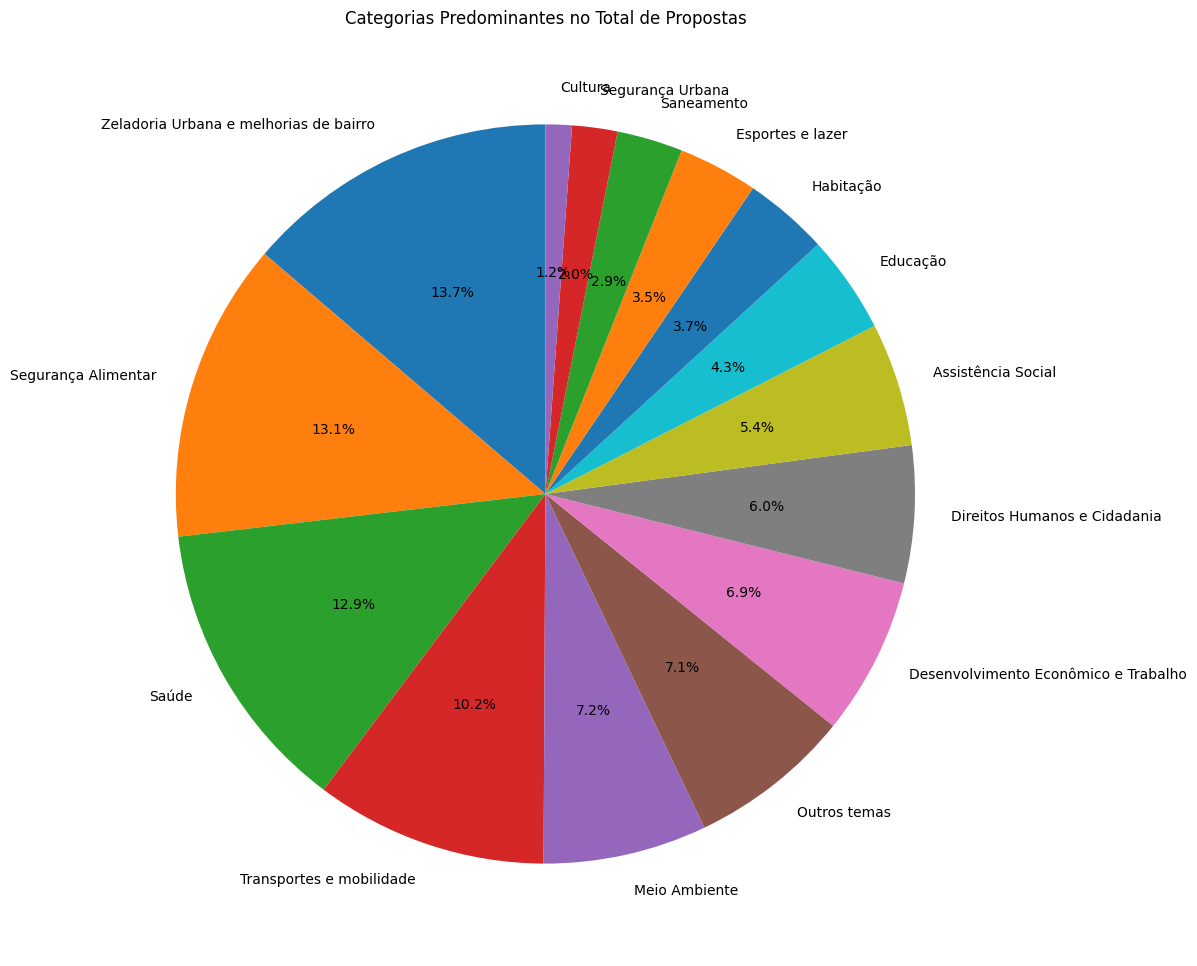

In [15]:
# Contagem das categorias no conjunto de dados completo
contagem_categorias = data['Categoria'].value_counts()

# Configurações do gráfico
plt.figure(figsize=(17, 12))
plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', startangle=90)
plt.title('Categorias Predominantes no Total de Propostas')

# Exibição do gráfico
plt.show()

### Densidade demográfica e número de propostas

In [16]:
# Incluir os dados de população e densidade demográfica das subprefeituras (https://www.prefeitura.sp.gov.br/cidade/secretarias/subprefeituras/subprefeituras/dados_demograficos/index.php?p=12758)
dados = {
    'Subprefeitura': ['Aricanduva/Formosa/Carrão', 'Butantã', 'Campo Limpo', 'Capela do Socorro', 'Casa Verde', 'Cidade Ademar', 'Cidade Tiradentes', 'Ermelino Matarazzo', 'Freguesia/Brasilândia', 'Guaianases', 'Ipiranga', 'Itaim Paulista', 'Itaquera', 'Jabaquara', 'Jaçanã/Tremembé', 'Lapa', "M'Boi Mirim", 'Mooca', 'Parelheiros', 'Penha', 'Perus', 'Pinheiros', 'Pirituba/Jaraguá', 'Santana/Tucuruvi', 'Santo Amaro', 'São Mateus', 'São Miguel', 'Sapopemba', 'Sé', 'Vila Maria/Vila Guilherme', 'Vila Mariana', 'Vila Prudente'],
    'População Total': [267702, 428217, 607105, 594930, 309376, 410998, 211501, 207509, 407245, 268508, 463804, 373127, 523848, 223780, 291867, 305526, 563305, 343980, 139441, 474659, 146046, 289743, 437592, 324815, 238025, 426794, 369496, 284524, 431106, 297713, 244632, 246589],
    'Densidade Demográfica': [12451, 7633, 16542, 4433, 11587, 13388, 14100, 13742, 12928, 15085, 12368, 17195, 9647, 15871, 4553, 7619, 9071, 9772, 394, 11090, 2553, 9140, 8000, 9361, 6347, 9319, 15206, 21076, 16454, 11277, 13005, 12454]
}

df_subprefeituras = pd.DataFrame(dados)

print(df_subprefeituras)

                Subprefeitura  População Total  Densidade Demográfica
0   Aricanduva/Formosa/Carrão           267702                  12451
1                     Butantã           428217                   7633
2                 Campo Limpo           607105                  16542
3           Capela do Socorro           594930                   4433
4                  Casa Verde           309376                  11587
5               Cidade Ademar           410998                  13388
6           Cidade Tiradentes           211501                  14100
7          Ermelino Matarazzo           207509                  13742
8       Freguesia/Brasilândia           407245                  12928
9                  Guaianases           268508                  15085
10                   Ipiranga           463804                  12368
11             Itaim Paulista           373127                  17195
12                   Itaquera           523848                   9647
13                  

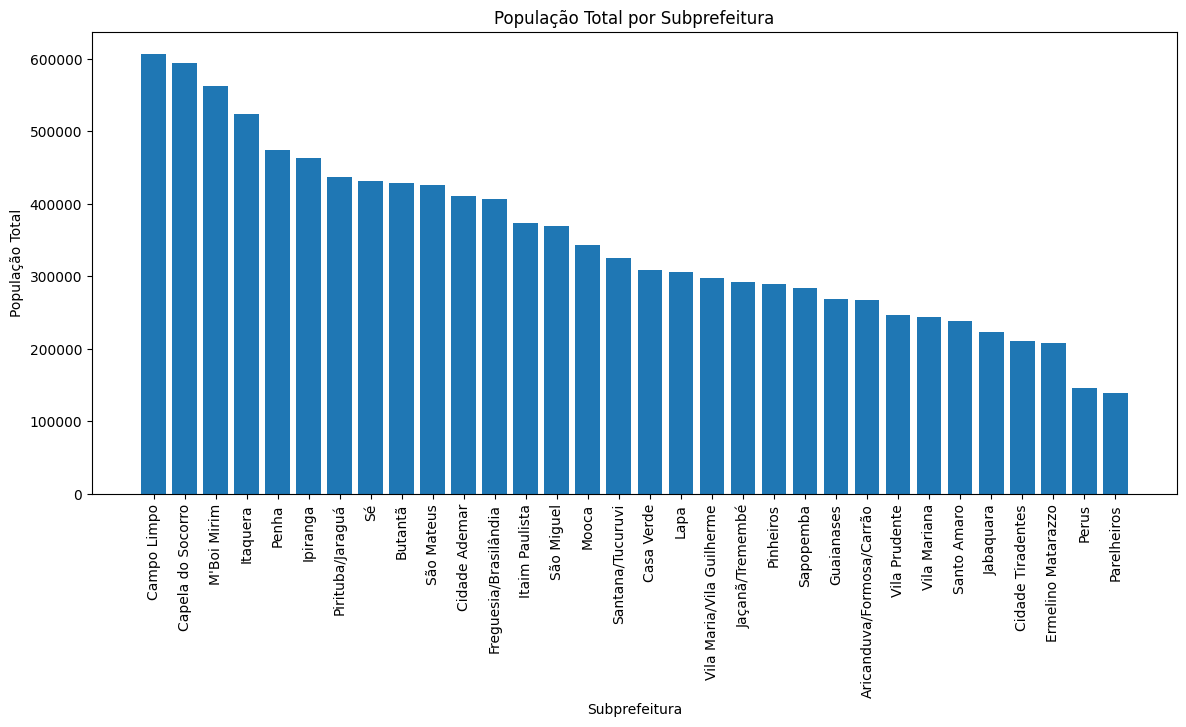

In [17]:
# Plotar o gráfico de barras Subprefeitura x População Total
df_subprefeituras_ordenado = df_subprefeituras.sort_values(by='População Total', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(df_subprefeituras_ordenado['Subprefeitura'], df_subprefeituras_ordenado['População Total'])
plt.xlabel('Subprefeitura')
plt.ylabel('População Total')
plt.title('População Total por Subprefeitura')
plt.xticks(rotation=90)
plt.show()

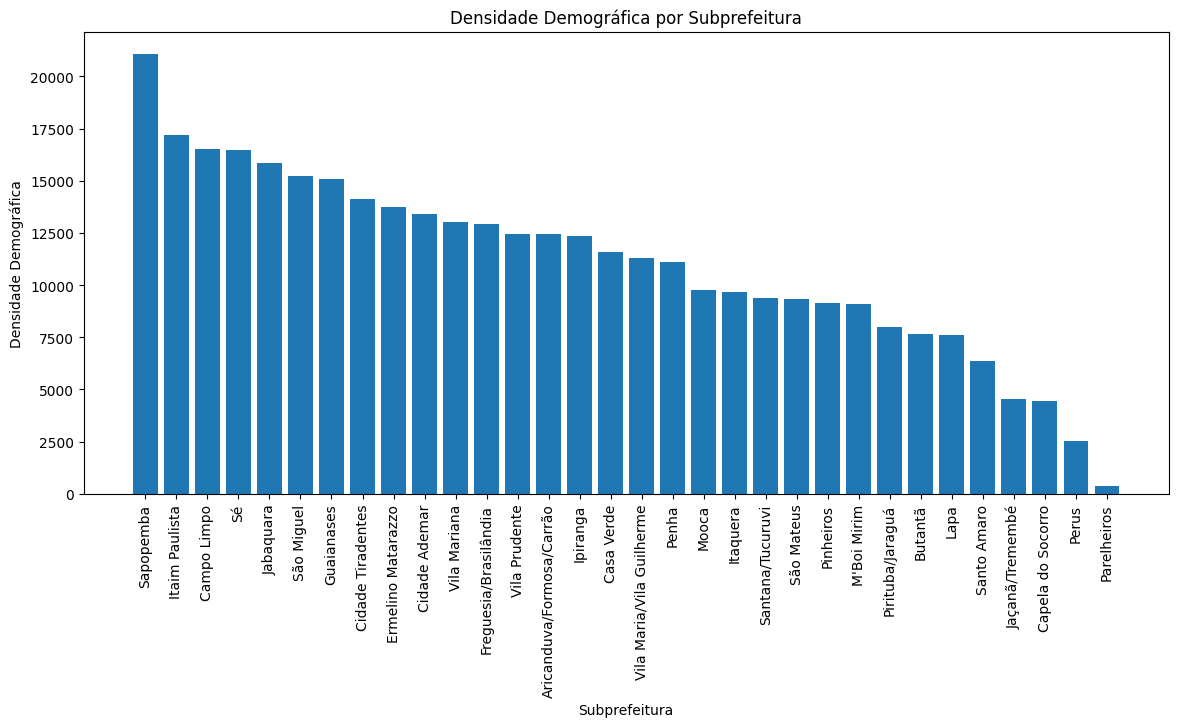

In [18]:
# Plotar o gráfico de barras Subprefeitura x Densidade Demográfica
df_subprefeituras_ordenado = df_subprefeituras.sort_values(by='Densidade Demográfica', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(df_subprefeituras_ordenado['Subprefeitura'], df_subprefeituras_ordenado['Densidade Demográfica'])
plt.xlabel('Subprefeitura')
plt.ylabel('Densidade Demográfica')
plt.title('Densidade Demográfica por Subprefeitura')
plt.xticks(rotation=90)
plt.show()

In [19]:
df_subprefeituras_propostas = pd.merge(df_subprefeituras, propostas_por_subprefeitura, on='Subprefeitura', how='inner')
print(df_subprefeituras_propostas)

                Subprefeitura  População Total  Densidade Demográfica  \
0   Aricanduva/Formosa/Carrão           267702                  12451   
1                     Butantã           428217                   7633   
2                 Campo Limpo           607105                  16542   
3           Capela do Socorro           594930                   4433   
4                  Casa Verde           309376                  11587   
5               Cidade Ademar           410998                  13388   
6           Cidade Tiradentes           211501                  14100   
7          Ermelino Matarazzo           207509                  13742   
8       Freguesia/Brasilândia           407245                  12928   
9                  Guaianases           268508                  15085   
10                   Ipiranga           463804                  12368   
11             Itaim Paulista           373127                  17195   
12                   Itaquera           523848     

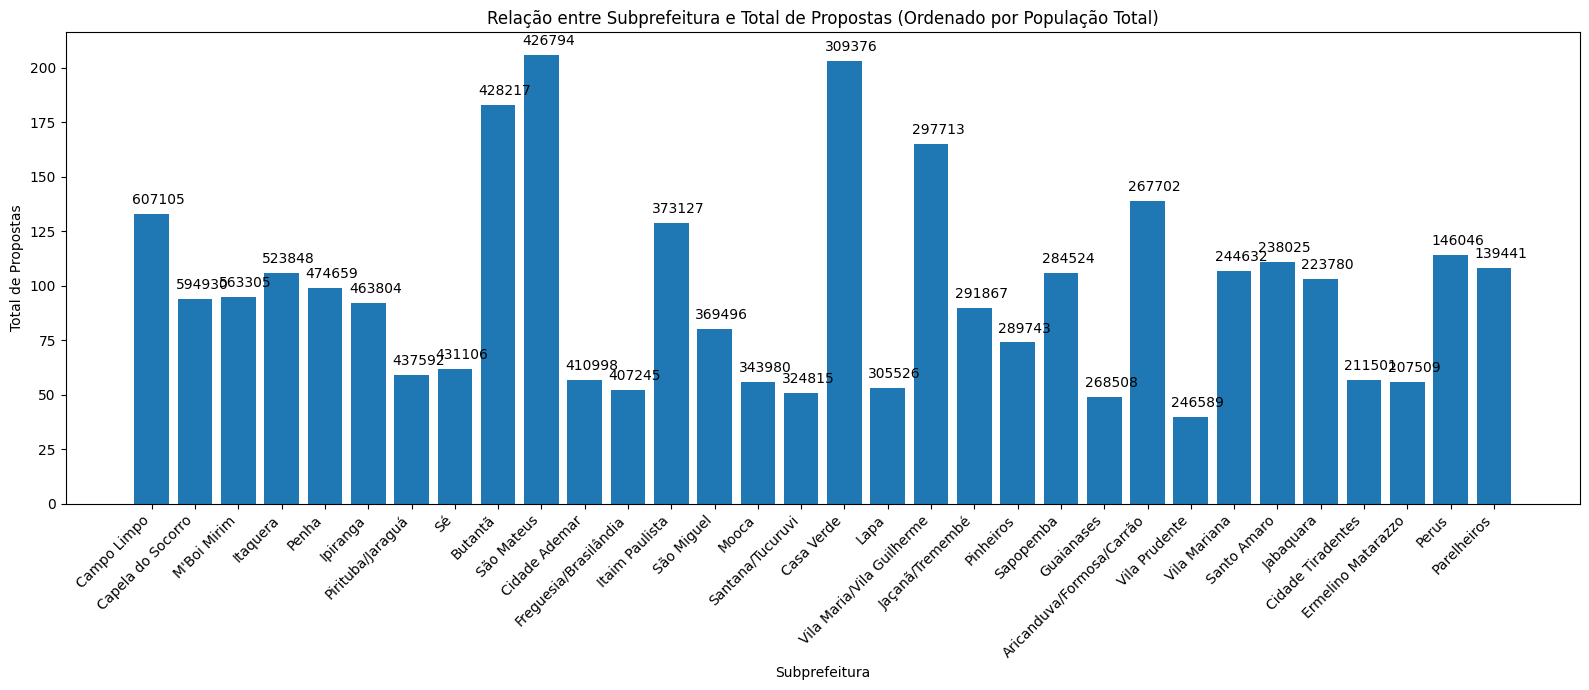

In [20]:
# Ordenar o dataframe por "População Total"
df_subprefeituras_propostas_ordenado = df_subprefeituras_propostas.sort_values(by='População Total', ascending=False)

plt.figure(figsize=(16, 7))
plt.bar(df_subprefeituras_propostas_ordenado['Subprefeitura'], df_subprefeituras_propostas_ordenado['Total de Propostas'])
plt.xlabel('Subprefeitura')
plt.ylabel('Total de Propostas')
plt.title('Relação entre Subprefeitura e Total de Propostas (Ordenado por População Total)')

# Adicionando o valor de "População Total" nas barras
for i, row in df_subprefeituras_propostas_ordenado.iterrows():
    plt.annotate(str(row['População Total']), (row['Subprefeitura'], row['Total de Propostas']), xytext=(5, 5),
                 textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

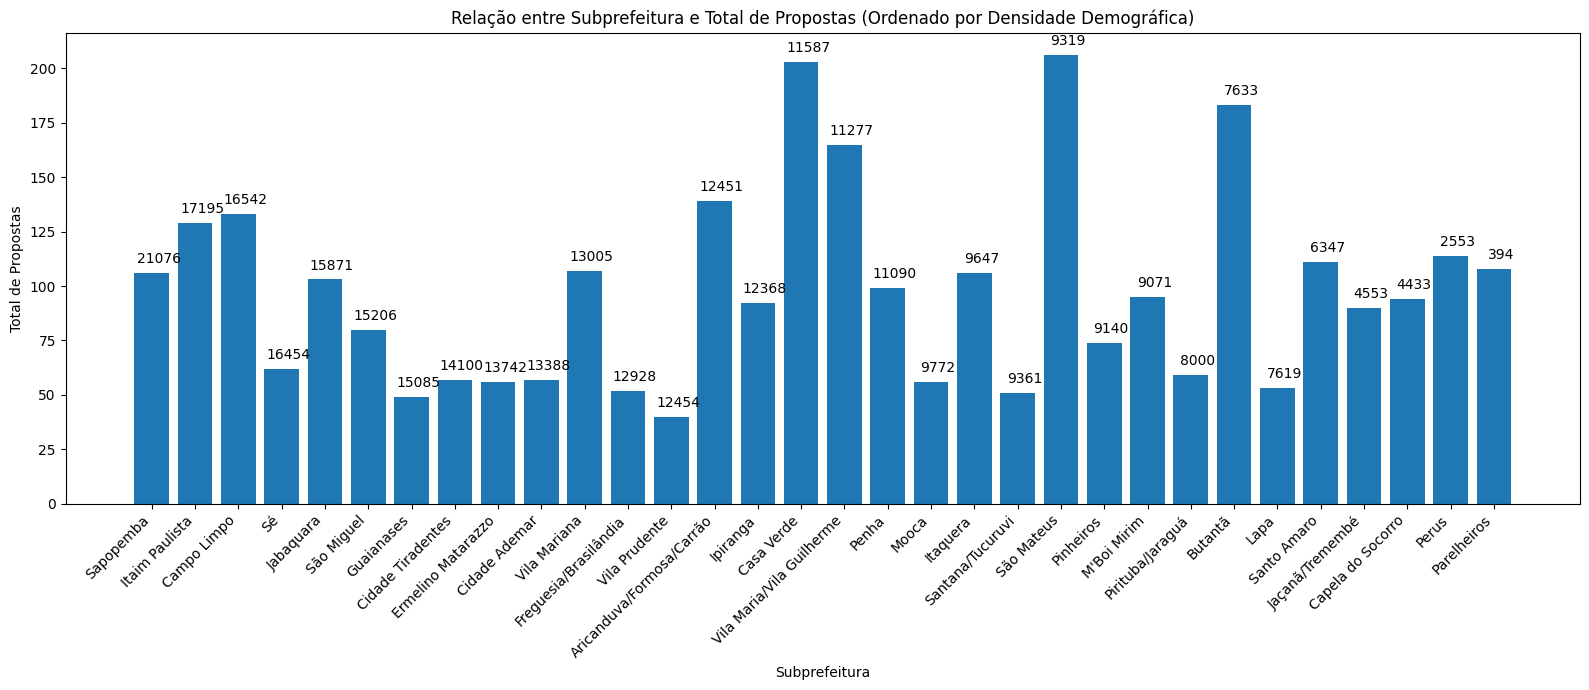

In [21]:
# Ordenar o dataframe por "Densidade Demográfica"
df_subprefeituras_propostas_ordenado = df_subprefeituras_propostas.sort_values(by='Densidade Demográfica', ascending=False)

plt.figure(figsize=(16, 7))
plt.bar(df_subprefeituras_propostas_ordenado['Subprefeitura'], df_subprefeituras_propostas_ordenado['Total de Propostas'])
plt.xlabel('Subprefeitura')
plt.ylabel('Total de Propostas')
plt.title('Relação entre Subprefeitura e Total de Propostas (Ordenado por Densidade Demográfica)')

# Adicionando o valor de "Densidade Demográfica" nas barras
for i, row in df_subprefeituras_propostas_ordenado.iterrows():
    plt.annotate(str(row['Densidade Demográfica']), (row['Subprefeitura'], row['Total de Propostas']), xytext=(5, 5),
                 textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Proporção de propostas por habitante da Subprefeitura
df_subprefeituras_propostas['Proporção de Propostas'] = df_subprefeituras_propostas['Total de Propostas'] / df_subprefeituras_propostas['População Total']
df_subprefeituras_propostas = df_subprefeituras_propostas.sort_values(by='Proporção de Propostas', ascending=False)
print("Proporção de propostas em relação à população:\n", df_subprefeituras_propostas[['Subprefeitura', 'Proporção de Propostas']])

Proporção de propostas em relação à população:
                 Subprefeitura  Proporção de Propostas
20                      Perus                0.000781
18                Parelheiros                0.000775
4                  Casa Verde                0.000656
29  Vila Maria/Vila Guilherme                0.000554
0   Aricanduva/Formosa/Carrão                0.000519
25                 São Mateus                0.000483
24                Santo Amaro                0.000466
13                  Jabaquara                0.000460
30               Vila Mariana                0.000437
1                     Butantã                0.000427
27                  Sapopemba                0.000373
11             Itaim Paulista                0.000346
14            Jaçanã/Tremembé                0.000308
7          Ermelino Matarazzo                0.000270
6           Cidade Tiradentes                0.000270
21                  Pinheiros                0.000255
2                 Campo Limpo     

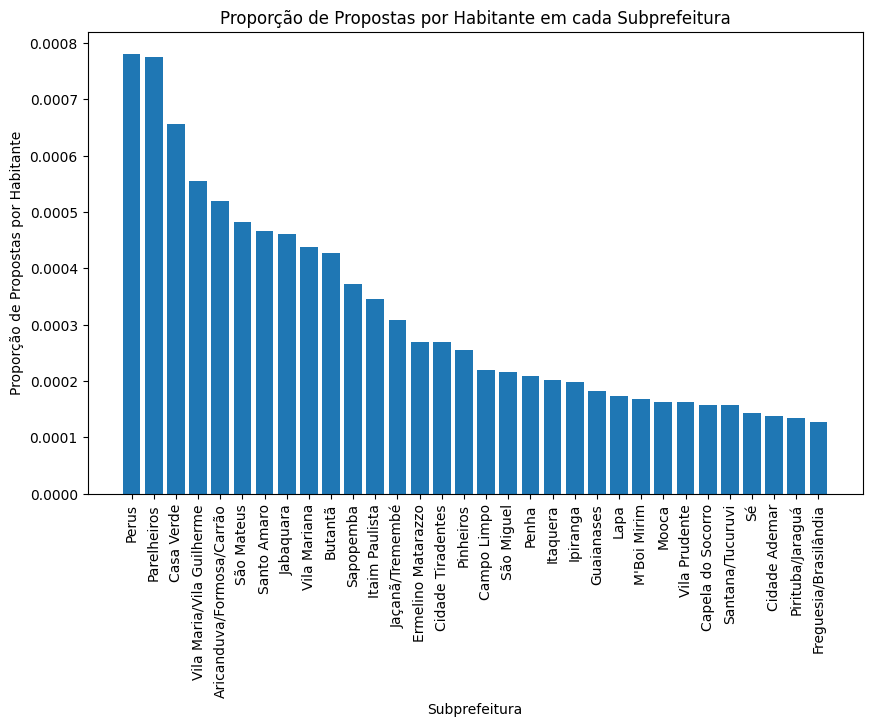

In [23]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_subprefeituras_propostas['Subprefeitura'], df_subprefeituras_propostas['Proporção de Propostas'])
plt.xticks(rotation=90)
plt.xlabel('Subprefeitura')
plt.ylabel('Proporção de Propostas por Habitante')
plt.title('Proporção de Propostas por Habitante em cada Subprefeitura')

# Exibir o gráfico
plt.show()

In [24]:
# Cálculo da correlação entre População Total e Total de Propostas (valor entre -1 e 1)
correlacao = df_subprefeituras_propostas['População Total'].corr(df_subprefeituras_propostas['Total de Propostas'])
print("Correlação entre população total e total de propostas:", correlacao)

Correlação entre população total e total de propostas: 0.1110334632448531


In [25]:
# Cálculo da correlação entre Densidade Demográfica e Total de Propostas (valor entre -1 e 1)
correlacao = df_subprefeituras_propostas['Densidade Demográfica'].corr(df_subprefeituras_propostas['Total de Propostas'])
print("Correlação entre densidade demográfica e total de propostas:", correlacao)

Correlação entre densidade demográfica e total de propostas: -0.09562984039352353


## Análise das subprefeituras escolhidas

### Funções base

In [26]:
def total_de_apoios(nome_da_subprefeitura: str) -> int:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  return subprefeitura_data['Quantidade de apoios'].sum()

In [27]:
def dados_gerais_da_subprefeitura(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Filtrar as propostas que têm viabilidade igual a "Viável"
  propostas_viaveis = subprefeitura_data[subprefeitura_data['Viabilidade'] == 'Viável']

  # Calcular o número de propostas viáveis
  num_propostas_viaveis = len(propostas_viaveis)

  total_apoios = total_de_apoios(nome_da_subprefeitura)

  # Calcular o número total de votos deixados
  total_votos = subprefeitura_data['Votos'].sum()

  # Obter população total e densidade demográfica
  subprefeitura_data = df_subprefeituras[df_subprefeituras['Subprefeitura'] == nome_da_subprefeitura]
  populacao_total = subprefeitura_data['População Total'].values[0]
  densidade_demografica = subprefeitura_data['Densidade Demográfica'].values[0]

  print("Número de propostas viáveis:", num_propostas_viaveis)
  print("Número total de apoios deixados:", total_apoios)
  print("Número total de votos deixados:", total_votos)
  print("População total:", populacao_total)
  print("Densidade demográfica:", densidade_demografica)

In [28]:
def grafico_propostas_por_categoria(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Contar o número de propostas em cada categoria
  categorias_count = subprefeitura_data['Categoria'].value_counts()

  # Criar o gráfico de setores
  plt.figure(figsize=(8, 6))
  plt.pie(categorias_count, labels=categorias_count.index, autopct='%1.1f%%')
  plt.title(f"Distribuição das Propostas por Categoria - {nome_da_subprefeitura}")
  plt.axis('equal')
  plt.show()

In [29]:
def propostas_mais_apoios(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Propostas com maior quantidade de apoios
  propostas_maior_apoio = subprefeitura_data.nlargest(10, 'Quantidade de apoios')

  print("Propostas com maior quantidade de apoios:")
  for i, proposta in propostas_maior_apoio.iterrows():
    print("Proposta:")
    print("- Título:", proposta['Título'])
    print("- Descrição:", proposta['Descrição'])
    print("- Quantidade de apoios:", proposta['Quantidade de apoios'])
    print()

In [30]:
def propostas_mais_votos(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Propostas com maior quantidade de votos
  propostas_maior_votos = subprefeitura_data.nlargest(10, 'Votos')

  print("\nPropostas com maior quantidade de votos:")
  for i, proposta in propostas_maior_votos.iterrows():
    print("Proposta:")
    print("- Título:", proposta['Título'])
    print("- Descrição:", proposta['Descrição'])
    print("- Categoria:", proposta['Categoria'])
    print("- Quantidade de votos:", proposta['Votos'])
    print()

In [31]:
def propostas_eleitas(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Propostas com resultado da votação "Eleita" e sua viabilidade
  eleitas = subprefeitura_data[subprefeitura_data['Resultado da votação'] == 'Eleita']

  print("\nPropostas eleitas e sua viabilidade:")
  for i, proposta in eleitas.iterrows():
    print("Proposta:")
    print("- Título:", proposta['Título'])
    print("- Descrição:", proposta['Descrição'])
    print("- Categoria:", proposta['Categoria'])
    print("- Quantidade de votos:", proposta['Votos'])
    print("- Viabilidade:", proposta['Viabilidade'])
    print()

In [32]:
def grafico_propostas_eleitas_viaveis(nome_da_subprefeitura: str) -> None:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  total_propostas = len(subprefeitura_data)
  eleitas = sum(subprefeitura_data['Resultado da votação'] == 'Eleita')

  # Calcular o número de propostas consideradas viáveis após serem eleitas
  eleitas_viaveis = sum((subprefeitura_data['Resultado da votação'] == 'Eleita') & (subprefeitura_data['Viabilidade'] == 'Viável'))

  # Criar o gráfico de barras
  plt.figure(figsize=(10, 6))
  plt.bar(['Total', 'Eleitas', 'Viáveis'], [total_propostas, eleitas, eleitas_viaveis])
  plt.xlabel('Propostas')
  plt.ylabel('Total')
  plt.title(f"Propostas totais, eleitas e viáveis - {nome_da_subprefeitura}")

  # Exibir o número correspondente de propostas acima de cada barra
  for i, v in enumerate([total_propostas, eleitas, eleitas_viaveis]):
      plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

  # Exibir o gráfico
  plt.show()


### Subprefeituras com menor participação

#### Subprefeitura: 32. Freguesia/Brasilândia

In [33]:
subprefeitura = 'Freguesia/Brasilândia'

In [34]:
dados_gerais_da_subprefeitura(subprefeitura)

Número de propostas viáveis: 3
Número total de apoios deixados: 0
Número total de votos deixados: 247
População total: 407245
Densidade demográfica: 12928


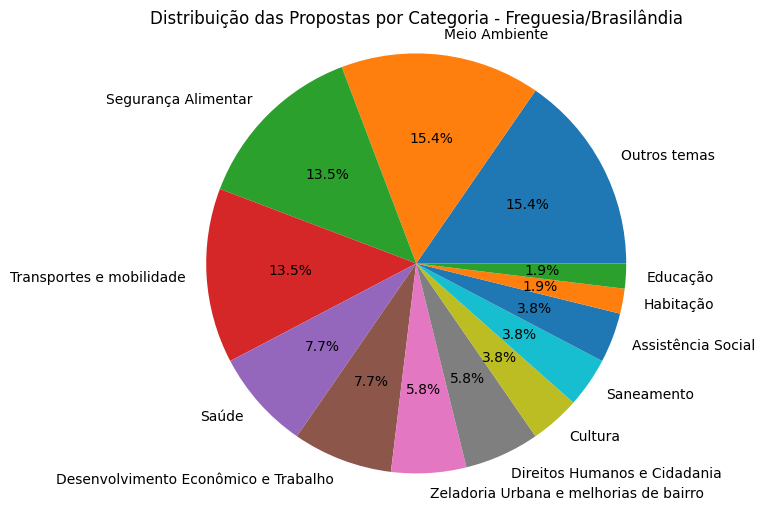

In [35]:
grafico_propostas_por_categoria(subprefeitura)

In [36]:
apoios = total_de_apoios(subprefeitura)
if (apoios != 0):
  propostas_mais_apoios(subprefeitura)
else:
  print("Total de apoios para a subprefeitura é 0.")

Total de apoios para a subprefeitura é 0.


In [37]:
propostas_mais_votos(subprefeitura)


Propostas com maior quantidade de votos:
Proposta:
- Título: Construção de Unidade Básica de Saúde (UBS) no Jardim Brasília
- Descrição: Boa noite, Meu nome é Samir. Há 31 anos eu moro em Taipas-ZN de São Paulo. Mais precisamente em uma parte chamada: Jd. Brasília, antigo Jd. Boa Vista. Há anos a prefeitura colocou um outdoor de uma construção de uma Undade Básica de Saúde (UBS) por aqui. Porém, nunca foi construído nada no local e o terreno continua baldio. Atenciosamente, Samir Gonçalves Cardoso
- Categoria: Saúde
- Quantidade de votos: 38

Proposta:
- Título: Arborização de Brasilândia e Freguesia com espécimes nativas da Mata Atlântica
- Descrição: arborização da area urbana ( Brasilandia e Freguesia) com plantio e replantio de especimes de arvores nativas da Mata Atlantica.
- Categoria: Meio Ambiente
- Quantidade de votos: 32

Proposta:
- Título: Urbanização do Córrego Rio das Pedras e continuação da Via Pública
- Descrição: urbanização do Corrego Rio das Pedras e continuação da 

In [38]:
propostas_eleitas(subprefeitura)


Propostas eleitas e sua viabilidade:
Proposta:
- Título: Arborização de Brasilândia e Freguesia com espécimes nativas da Mata Atlântica
- Descrição: arborização da area urbana ( Brasilandia e Freguesia) com plantio e replantio de especimes de arvores nativas da Mata Atlantica.
- Categoria: Meio Ambiente
- Quantidade de votos: 32
- Viabilidade: Viável

Proposta:
- Título: Alocar a sede da Subprefeitura Freguesia/Brasilândia no território
- Descrição: Gostaria de propor o estudo para que a sede da Subprefeitura Freguesia/Brasilândia seja inserida no território da Subprefeitura, já que hoje está localizada na área de atuação da Subprefeitura Casa Verde/Cachoeirinha.
- Categoria: Outros temas
- Quantidade de votos: 19
- Viabilidade: Inviável

Proposta:
- Título: Urbanização do Córrego Rio das Pedras e continuação da Via Pública
- Descrição: urbanização do Corrego Rio das Pedras e continuação da Via Pública que está ao fundo do mesmo, para ligar a Estrada Lazaro Amancio de Barros/ Avenida 

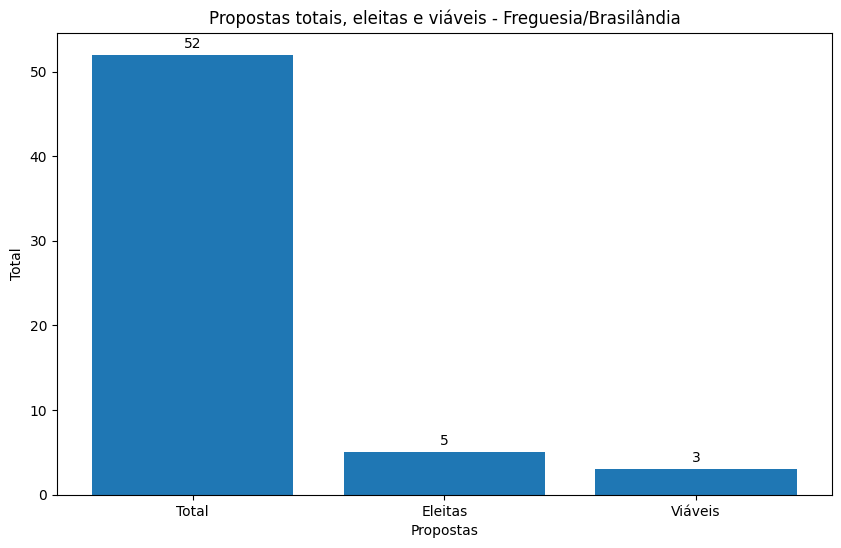

In [39]:
grafico_propostas_eleitas_viaveis(subprefeitura)

#### Subprefeitura: 31. Pirituba/Jaraguá

In [40]:
subprefeitura = 'Pirituba/Jaraguá'

In [41]:
dados_gerais_da_subprefeitura(subprefeitura)

Número de propostas viáveis: 2
Número total de apoios deixados: 0
Número total de votos deixados: 354
População total: 437592
Densidade demográfica: 8000


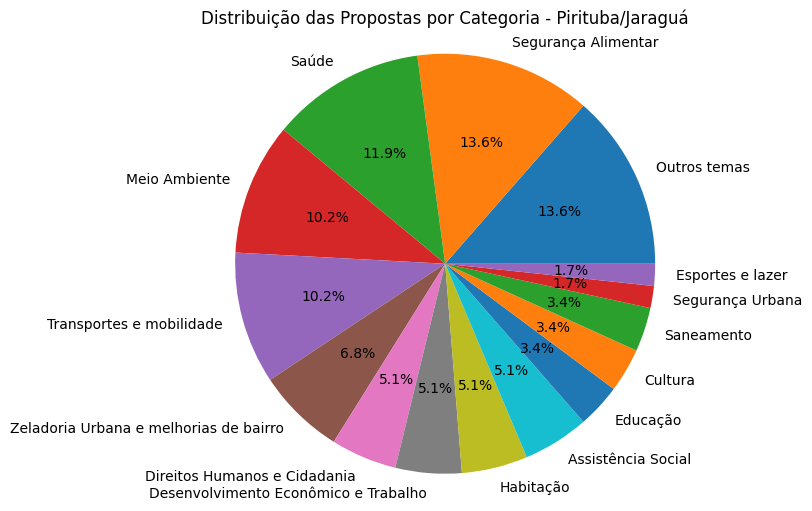

In [42]:
grafico_propostas_por_categoria(subprefeitura)

In [43]:
apoios = total_de_apoios(subprefeitura)
if (apoios != 0):
  propostas_mais_apoios(subprefeitura)
else:
  print("Total de apoios para a subprefeitura é 0.")

Total de apoios para a subprefeitura é 0.


In [44]:
propostas_mais_votos(subprefeitura)


Propostas com maior quantidade de votos:
Proposta:
- Título: Implantar Casa de Parto - Centro de Parto Normal
- Descrição: Implantar Casa de Parto Criados como estratégia governamental de humanizar a assistência ao parto no país, os Centros de Parto Normal (nome oficial) são ambientes que unem o aconchego do lar aos recursos necessários para o atendimento de partos normais de baixo risco. O tratamento oferecido é centrado nas necessidades e na segurança da parturiente e do bebê, com acolhimento e respeito.
- Categoria: Saúde
- Quantidade de votos: 71

Proposta:
- Título: Construção de um dos CAPS na proximidade do território indígena Guarani
- Descrição: Construção de CAPS Nossa recomendação é a construção de um dos CAPS na proximidade do território indígena Guarani, visando também o atendimento da comunidade, realizando inclusive uma busca ativa para identificação da demanda por este tipo de atendimento. Proposta recomendada pelo Minipúblico de Pirituba-Jaraguá
- Categoria: Saúde
- Q

In [45]:
propostas_eleitas(subprefeitura)


Propostas eleitas e sua viabilidade:
Proposta:
- Título: Implantar Casa de Parto - Centro de Parto Normal
- Descrição: Implantar Casa de Parto Criados como estratégia governamental de humanizar a assistência ao parto no país, os Centros de Parto Normal (nome oficial) são ambientes que unem o aconchego do lar aos recursos necessários para o atendimento de partos normais de baixo risco. O tratamento oferecido é centrado nas necessidades e na segurança da parturiente e do bebê, com acolhimento e respeito.
- Categoria: Saúde
- Quantidade de votos: 71
- Viabilidade: Inviável

Proposta:
- Título: Construção de três Centros para Juventude 
- Descrição: Construção de CJ - Centro para Juventude Ação recomendada pelo Minipúblico Pirituba-Jaraguá. Os 3 CJs (1 por distrito) sugeridos serão equipamentos importantes como espaços de convivência e formação complementar para adolescentes, que devem andar em paralelo com outras ações na área de cultura.
- Categoria: Assistência Social
- Quantidade de v

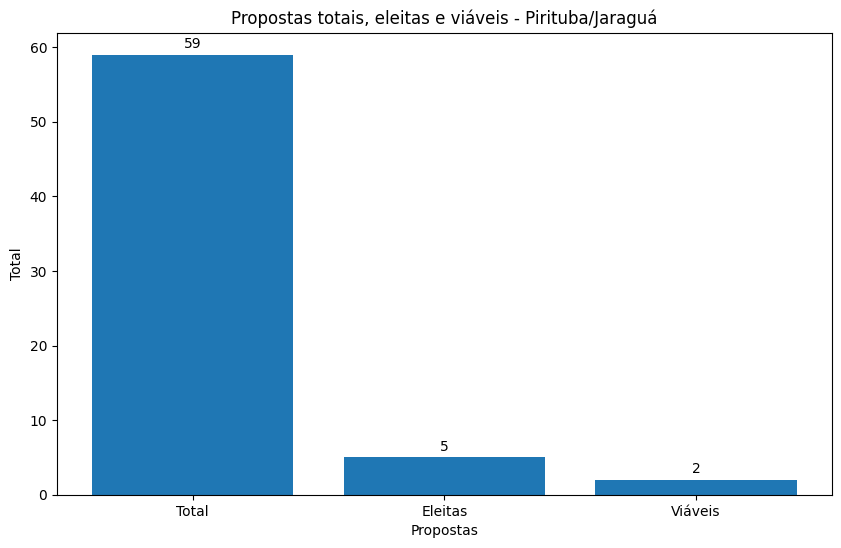

In [46]:
grafico_propostas_eleitas_viaveis(subprefeitura)

#### Subprefeitura: 30. Cidade Ademar

In [47]:
subprefeitura = 'Cidade Ademar'

In [48]:
dados_gerais_da_subprefeitura(subprefeitura)

Número de propostas viáveis: 2
Número total de apoios deixados: 0
Número total de votos deixados: 1339
População total: 410998
Densidade demográfica: 13388


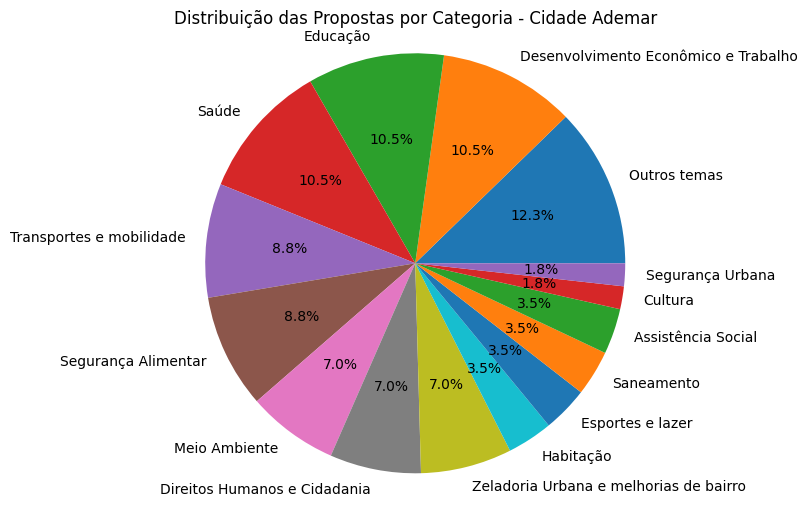

In [49]:
grafico_propostas_por_categoria(subprefeitura)

In [50]:
apoios = total_de_apoios(subprefeitura)
if (apoios != 0):
  propostas_mais_apoios(subprefeitura)
else:
  print("Total de apoios para a subprefeitura é 0.")

Total de apoios para a subprefeitura é 0.


In [51]:
propostas_mais_votos(subprefeitura)


Propostas com maior quantidade de votos:
Proposta:
- Título: Construção de 2000 unidades de HIS's  nos distritos de Cidade Ademar e pedreira.
- Descrição: Construção de 2000 unidades de moradia de interesse social em áreas incluidas em PEUC nos distritos de Cidade ademar e pedreira.
- Categoria: Habitação
- Quantidade de votos: 241

Proposta:
- Título: Implantação de 1 CEU na Cidade Ademar
- Descrição: Implantação de 1 CEU na Cidade Ademar, com projeto e formato a serem debatidos com a população e organizações locais. Demanda histórica da região, que tem o apoio de muitas organizações, incluindo Conseg local, Movimento de Saúde e Movimento de Moradia, além de lideranças e moradores. Muitas mobilizações já ocorreram pela instalação do equipamento. Desde 2007, documentos com a reivindicação foram entregues ao Poder Público. Em junho de 2015, o Fórum Social entregou ao prefeito de então um abaixo-assinado, com 10.300 assinaturas, e uma carta assinada por 28 organizações. Desde sua criaçã

In [52]:
propostas_eleitas(subprefeitura)


Propostas eleitas e sua viabilidade:
Proposta:
- Título: Construção de 2000 unidades de HIS's  nos distritos de Cidade Ademar e pedreira.
- Descrição: Construção de 2000 unidades de moradia de interesse social em áreas incluidas em PEUC nos distritos de Cidade ademar e pedreira.
- Categoria: Habitação
- Quantidade de votos: 241
- Viabilidade: Viável

Proposta:
- Título: Implantação de 1 CEU na Cidade Ademar
- Descrição: Implantação de 1 CEU na Cidade Ademar, com projeto e formato a serem debatidos com a população e organizações locais. Demanda histórica da região, que tem o apoio de muitas organizações, incluindo Conseg local, Movimento de Saúde e Movimento de Moradia, além de lideranças e moradores. Muitas mobilizações já ocorreram pela instalação do equipamento. Desde 2007, documentos com a reivindicação foram entregues ao Poder Público. Em junho de 2015, o Fórum Social entregou ao prefeito de então um abaixo-assinado, com 10.300 assinaturas, e uma carta assinada por 28 organizações

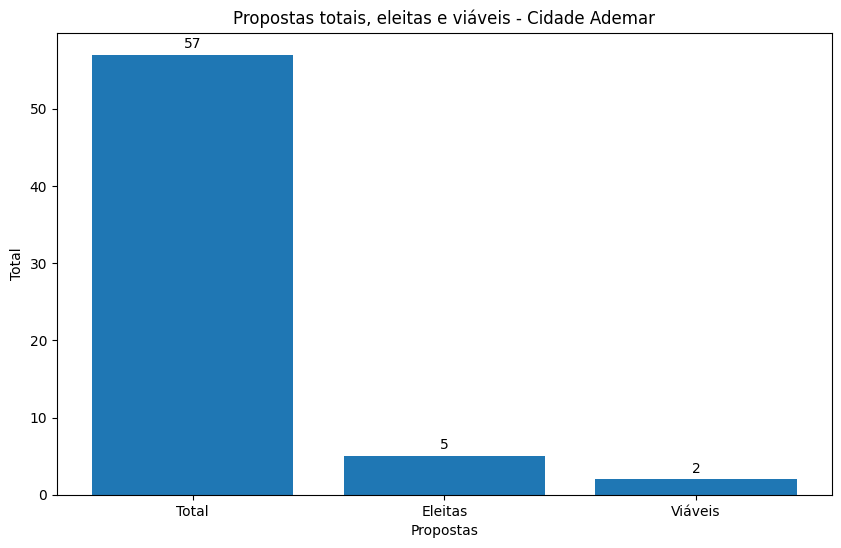

In [53]:
grafico_propostas_eleitas_viaveis(subprefeitura)

### Subprefeituras com maior participação

#### Subprefeitura: 1. Perus

In [54]:
subprefeitura = 'Perus'

In [55]:
dados_gerais_da_subprefeitura(subprefeitura)

Número de propostas viáveis: 4
Número total de apoios deixados: 0
Número total de votos deixados: 595
População total: 146046
Densidade demográfica: 2553


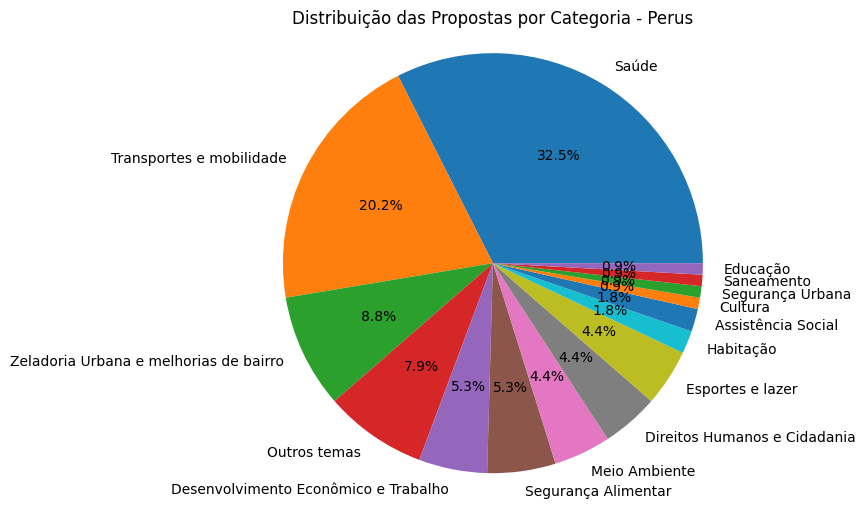

In [56]:
grafico_propostas_por_categoria(subprefeitura)

In [57]:
apoios = total_de_apoios(subprefeitura)
if (apoios != 0):
  propostas_mais_apoios(subprefeitura)
else:
  print("Total de apoios para a subprefeitura é 0.")

Total de apoios para a subprefeitura é 0.


In [58]:
propostas_mais_votos(subprefeitura)


Propostas com maior quantidade de votos:
Proposta:
- Título: Reconstrução da ponte que passa sobre o córrego buracão no Bairro Sol Nascente
- Descrição: Reconstruir a ponte que passa sobre o córrego buracão no Bairro Sol Nascente - Perus. Aumentando sua capacidade de tráfego, altura e redirecionar a tubulação de agua da SABESP Justificativas: 1) Garantir o diretiro a mobilidade principalmente nos dias de chuvas mais fortes. 2) Aumento do tráfego que em breve será maior ainda tendo em vista novo empreendimento de construção de casa.
- Categoria: Transportes e mobilidade
- Quantidade de votos: 90

Proposta:
- Título: Implantação de um Hospital e Maternidade Municipal Perus e Distrito Anhanguera
- Descrição: Precisamos urgentemente de um Hospital e Maternidade Municipal Perus e Distrito Anhanguera, uma vez que o censo do IBGE apresenta números defasados de habitantes constando nos dados oficiais apenas 176 mil habitantes, quando na realidade de hoje em pleno ano de 2021 é outra, praticam

In [59]:
propostas_eleitas(subprefeitura)


Propostas eleitas e sua viabilidade:
Proposta:
- Título: Construção da UBS Jardim Jaraguá, e dentre outras
- Descrição: Construção da UBS Jardim Jaraguá (KM22), uma luta de mais de 10 anos, no qual esta proposta, já existe na Conferência Municipal de Saúde desde 2018 e que com uma reunião com o Secretário de Saúde no final de 2019, foi previsto agora em 2021 a possibilidade de colocar no Orçamento de 2022, recursos para começar a obra. Junto esta construção está previso o CEO (Centro de Especialidades Odontológicas). O terreno já está com a SMS (Secretaria Municipal de Saúde).
- Categoria: Saúde
- Quantidade de votos: 61
- Viabilidade: Inviável

Proposta:
- Título: Reforma no Terminal Britânia - Anhanguera
- Descrição: Adequação no Terminal Britânia - Anhanguera a instalação de banheiros, instalação de equipamentos para carregar o bilhete único e um local para a população carregar o bilhete único comum. 1) Não existe banheiro público no terminal, no qual a população, motoristas e cobr

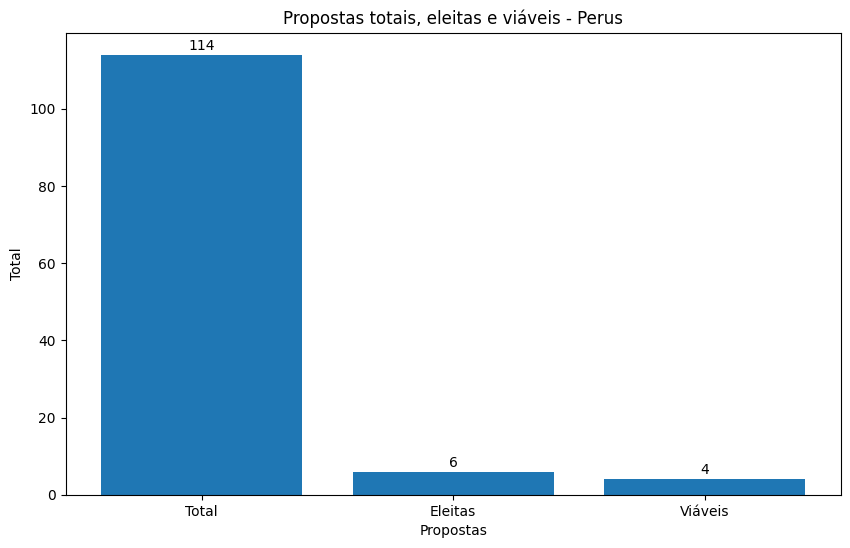

In [60]:
grafico_propostas_eleitas_viaveis(subprefeitura)

#### Subprefeitura: 2. Parelheiros

In [61]:
subprefeitura = 'Parelheiros'

In [62]:
dados_gerais_da_subprefeitura(subprefeitura)

Número de propostas viáveis: 1
Número total de apoios deixados: 0
Número total de votos deixados: 202
População total: 139441
Densidade demográfica: 394


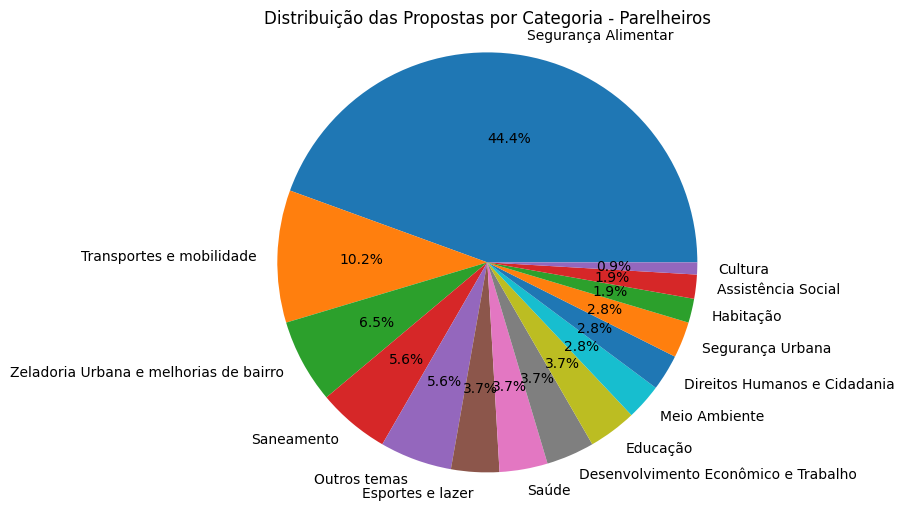

In [63]:
grafico_propostas_por_categoria(subprefeitura)

In [64]:
apoios = total_de_apoios(subprefeitura)
if (apoios != 0):
  propostas_mais_apoios(subprefeitura)
else:
  print("Total de apoios para a subprefeitura é 0.")

Total de apoios para a subprefeitura é 0.


In [65]:
propostas_mais_votos(subprefeitura)


Propostas com maior quantidade de votos:
Proposta:
- Título: Criação de mais áreas de lazer em toda a região
- Descrição: Criação de mais áreas de lazer nos Bairros Hoje temos o parque Recreio em parelheiros mais conhecido como chácara progresso e temos muitos espaço para criar uma área de lazer uma delas fica localizada na Rua Sônia n 549 conhecido como praça das Palmeiras já estamos a mais o menos 10 anos batalhando para que o poder público possa criar está praça que atenderá a todos tanto o bairro chácara progresso como o Vila rochel sempre que nos moradores podemos solicitamos a limpeza do local via 156 e sempre somos atendido . #pracadaspalmeiras
- Categoria: Esportes e lazer
- Quantidade de votos: 32

Proposta:
- Título: Pavimentação de ruas e melhorias gerais na Chácara Progresso
- Descrição: Hoje o Jardim progresso em parelheiros temos 2 ruas pavimentadas por inteiro e 2 ruas uma 300 metros e outra 500 metros e temos mais o menos 9 ruas sem pavimentação precisamos urgentemente

In [66]:
propostas_eleitas(subprefeitura)


Propostas eleitas e sua viabilidade:
Proposta:
- Título: Criação de mais áreas de lazer em toda a região
- Descrição: Criação de mais áreas de lazer nos Bairros Hoje temos o parque Recreio em parelheiros mais conhecido como chácara progresso e temos muitos espaço para criar uma área de lazer uma delas fica localizada na Rua Sônia n 549 conhecido como praça das Palmeiras já estamos a mais o menos 10 anos batalhando para que o poder público possa criar está praça que atenderá a todos tanto o bairro chácara progresso como o Vila rochel sempre que nos moradores podemos solicitamos a limpeza do local via 156 e sempre somos atendido . #pracadaspalmeiras
- Categoria: Esportes e lazer
- Quantidade de votos: 32
- Viabilidade: Inviável

Proposta:
- Título: Pavimentação de ruas e melhorias gerais na Chácara Progresso
- Descrição: Hoje o Jardim progresso em parelheiros temos 2 ruas pavimentadas por inteiro e 2 ruas uma 300 metros e outra 500 metros e temos mais o menos 9 ruas sem pavimentação pre

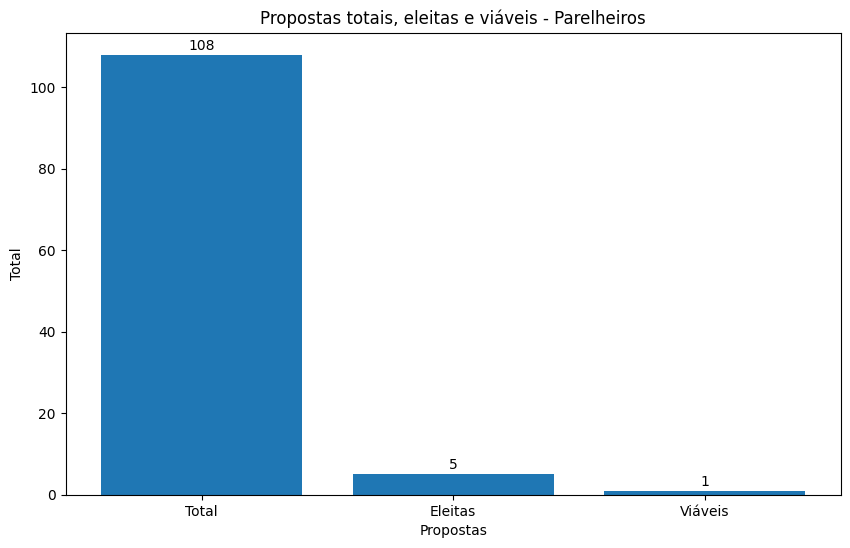

In [67]:
grafico_propostas_eleitas_viaveis(subprefeitura)

#### Subprefeitura: 3. Casa Verde

In [68]:
subprefeitura = 'Casa Verde'

In [69]:
dados_gerais_da_subprefeitura(subprefeitura)

Número de propostas viáveis: 1
Número total de apoios deixados: 0
Número total de votos deixados: 540
População total: 309376
Densidade demográfica: 11587


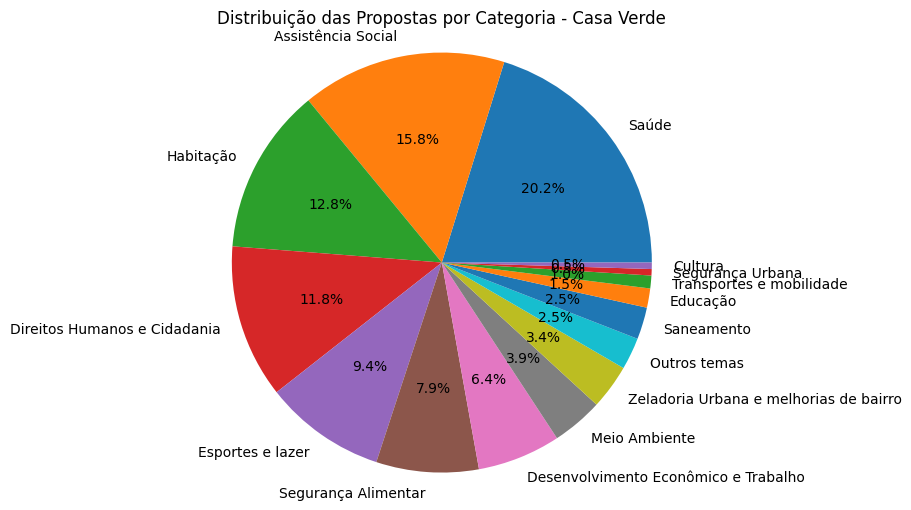

In [70]:
grafico_propostas_por_categoria(subprefeitura)

In [71]:
apoios = total_de_apoios(subprefeitura)
if (apoios != 0):
  propostas_mais_apoios(subprefeitura)
else:
  print("Total de apoios para a subprefeitura é 0.")

Total de apoios para a subprefeitura é 0.


In [72]:
propostas_mais_votos(subprefeitura)


Propostas com maior quantidade de votos:
Proposta:
- Título: UBS e USF  na região do Peri Alto
- Descrição: UBS - Unidade Básica de Saúde e USF - Unidade de Saúde da Família na região do Peri Alto.
- Categoria: Saúde
- Quantidade de votos: 82

Proposta:
- Título: Conselho Tutelar específico para o Distrito da Cachoeirinha
- Descrição: UM CONSELHO TUTELAR ESPECÍFICO PARA O DISTRITO DA CACHOERINHA
- Categoria: Direitos Humanos e Cidadania
- Quantidade de votos: 64

Proposta:
- Título: SASF e Proteção Social Básica a Domicílio para região do Boi Malhado
- Descrição: SASF SERVIÇO DE ASSISTÊNCIA SOCIAL À FAMILIA E PROTEÇÃO SOCIAL BASICA A DOMICÍLIO PARA A REGIÃO DO BOI MALHADO
- Categoria: Assistência Social
- Quantidade de votos: 60

Proposta:
- Título: Criação da UPA de Vila Nova Cachoeirinha
- Descrição: Criação da UPA de Vila Nova Cachoeirinha
- Categoria: Saúde
- Quantidade de votos: 59

Proposta:
- Título: Urbanização e Regularização Fundiária das Comunidades Futuro Melhor e Sapo
- D

In [73]:
propostas_eleitas(subprefeitura)


Propostas eleitas e sua viabilidade:
Proposta:
- Título: SASF e Proteção Social Básica a Domicílio para região do Boi Malhado
- Descrição: SASF SERVIÇO DE ASSISTÊNCIA SOCIAL À FAMILIA E PROTEÇÃO SOCIAL BASICA A DOMICÍLIO PARA A REGIÃO DO BOI MALHADO
- Categoria: Assistência Social
- Quantidade de votos: 60
- Viabilidade: Inviável

Proposta:
- Título: Urbanização e Regularização Fundiária das Comunidades Futuro Melhor e Sapo
- Descrição: Urbanização e Regularização Fundiária das Comunidades Futuro Melhor e Sapo
- Categoria: Habitação
- Quantidade de votos: 54
- Viabilidade: Inviável

Proposta:
- Título: Criação da UPA de Vila Nova Cachoeirinha
- Descrição: Criação da UPA de Vila Nova Cachoeirinha
- Categoria: Saúde
- Quantidade de votos: 59
- Viabilidade: Inviável

Proposta:
- Título: UBS e USF  na região do Peri Alto
- Descrição: UBS - Unidade Básica de Saúde e USF - Unidade de Saúde da Família na região do Peri Alto.
- Categoria: Saúde
- Quantidade de votos: 82
- Viabilidade: Viável


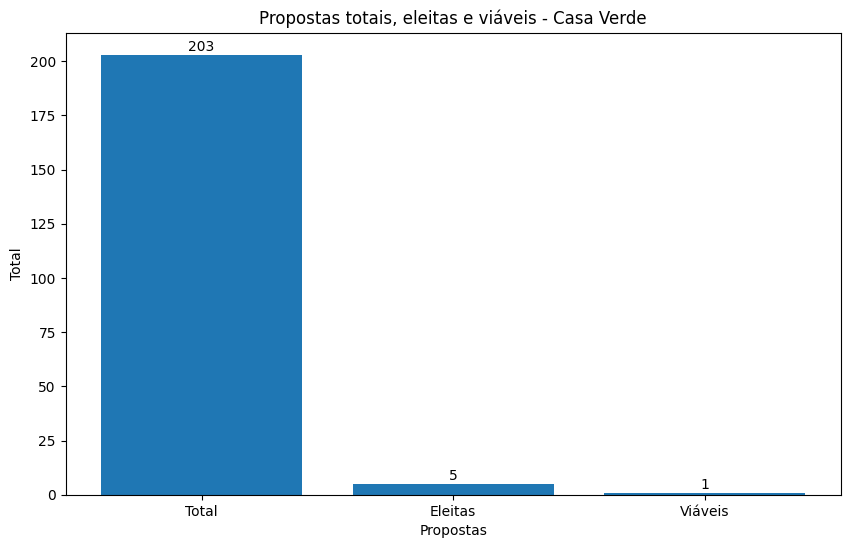

In [74]:
grafico_propostas_eleitas_viaveis(subprefeitura)

# Análise conjunta com os dados do Mapa da Desigualdade de 2022

## Análise de correlação entre as colunas do Mapa da Desigualdade


In [75]:
desigualdade_dataset_url = 'https://raw.githubusercontent.com/iwamotoraphael/participacao-politica/main/arquivos%20de%20dados/mapa-da-desigualdade-cortado.csv'
desigualdade_data = pd.read_csv(desigualdade_dataset_url, sep=';', on_bad_lines='skip', encoding = "ISO-8859-1", na_values=[-1])
desigualdade_data = desigualdade_data.drop(' População total ', axis=1)
desigualdade_data = desigualdade_data.drop(' ID_REGIAO ', axis=1)
desigualdade_data = desigualdade_data.drop(' DISTRITO ', axis=1)
print(desigualdade_data.head())

    População preta e parda    População feminina    População Infantil   \
0                       56.8                  51.4                  10.9   
1                       60.1                  51.4                  10.8   
2                       53.9                  52.2                  10.4   
3                       50.0                  52.4                  10.1   
4                       32.0                  52.3                   8.4   

    População jovem   População em situação de rua   Favelas   \
0               47.3                        157.00     13.50    
1               47.8                         25.00     19.40    
2               44.9                        152.00     21.10    
3               43.0                        154.00     16.20    
4               38.6                         50.00     23.70    

   Habitações  de Interesse Social (HIS)  Licenciadas   \
0                                          3,830.00      
1                                   

### Análise geral




<ipython-input-76-16a3bad4b3f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = desigualdade_data.corr()


<Axes: >

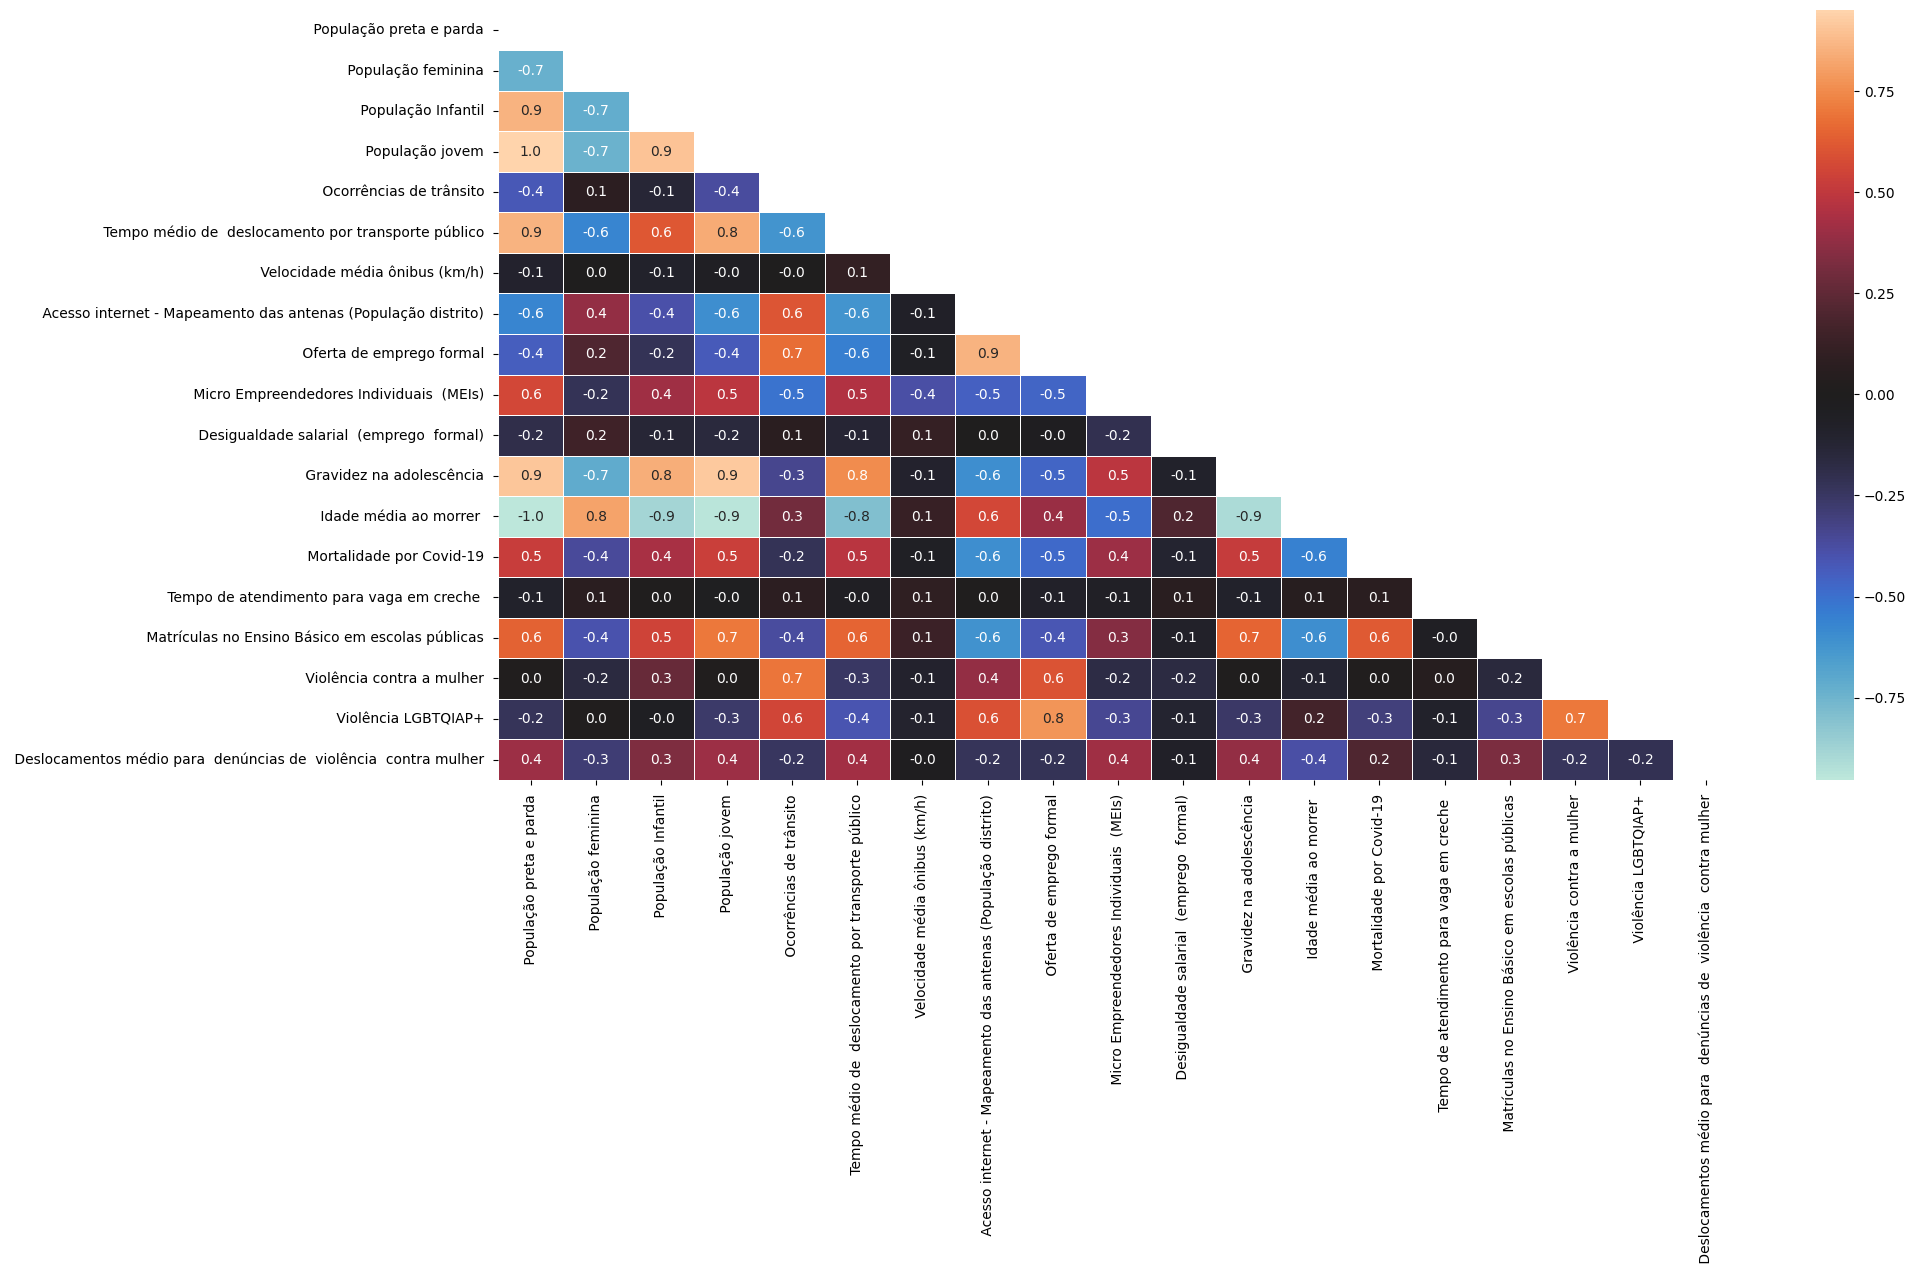

In [76]:
correlation = desigualdade_data.corr()
fig, ax = plt.subplots(figsize=(20, 10))
triangular_mask = np.triu(correlation)
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6, center=0, mask=triangular_mask)
plot

### Análise das correlações fortes

<Axes: >

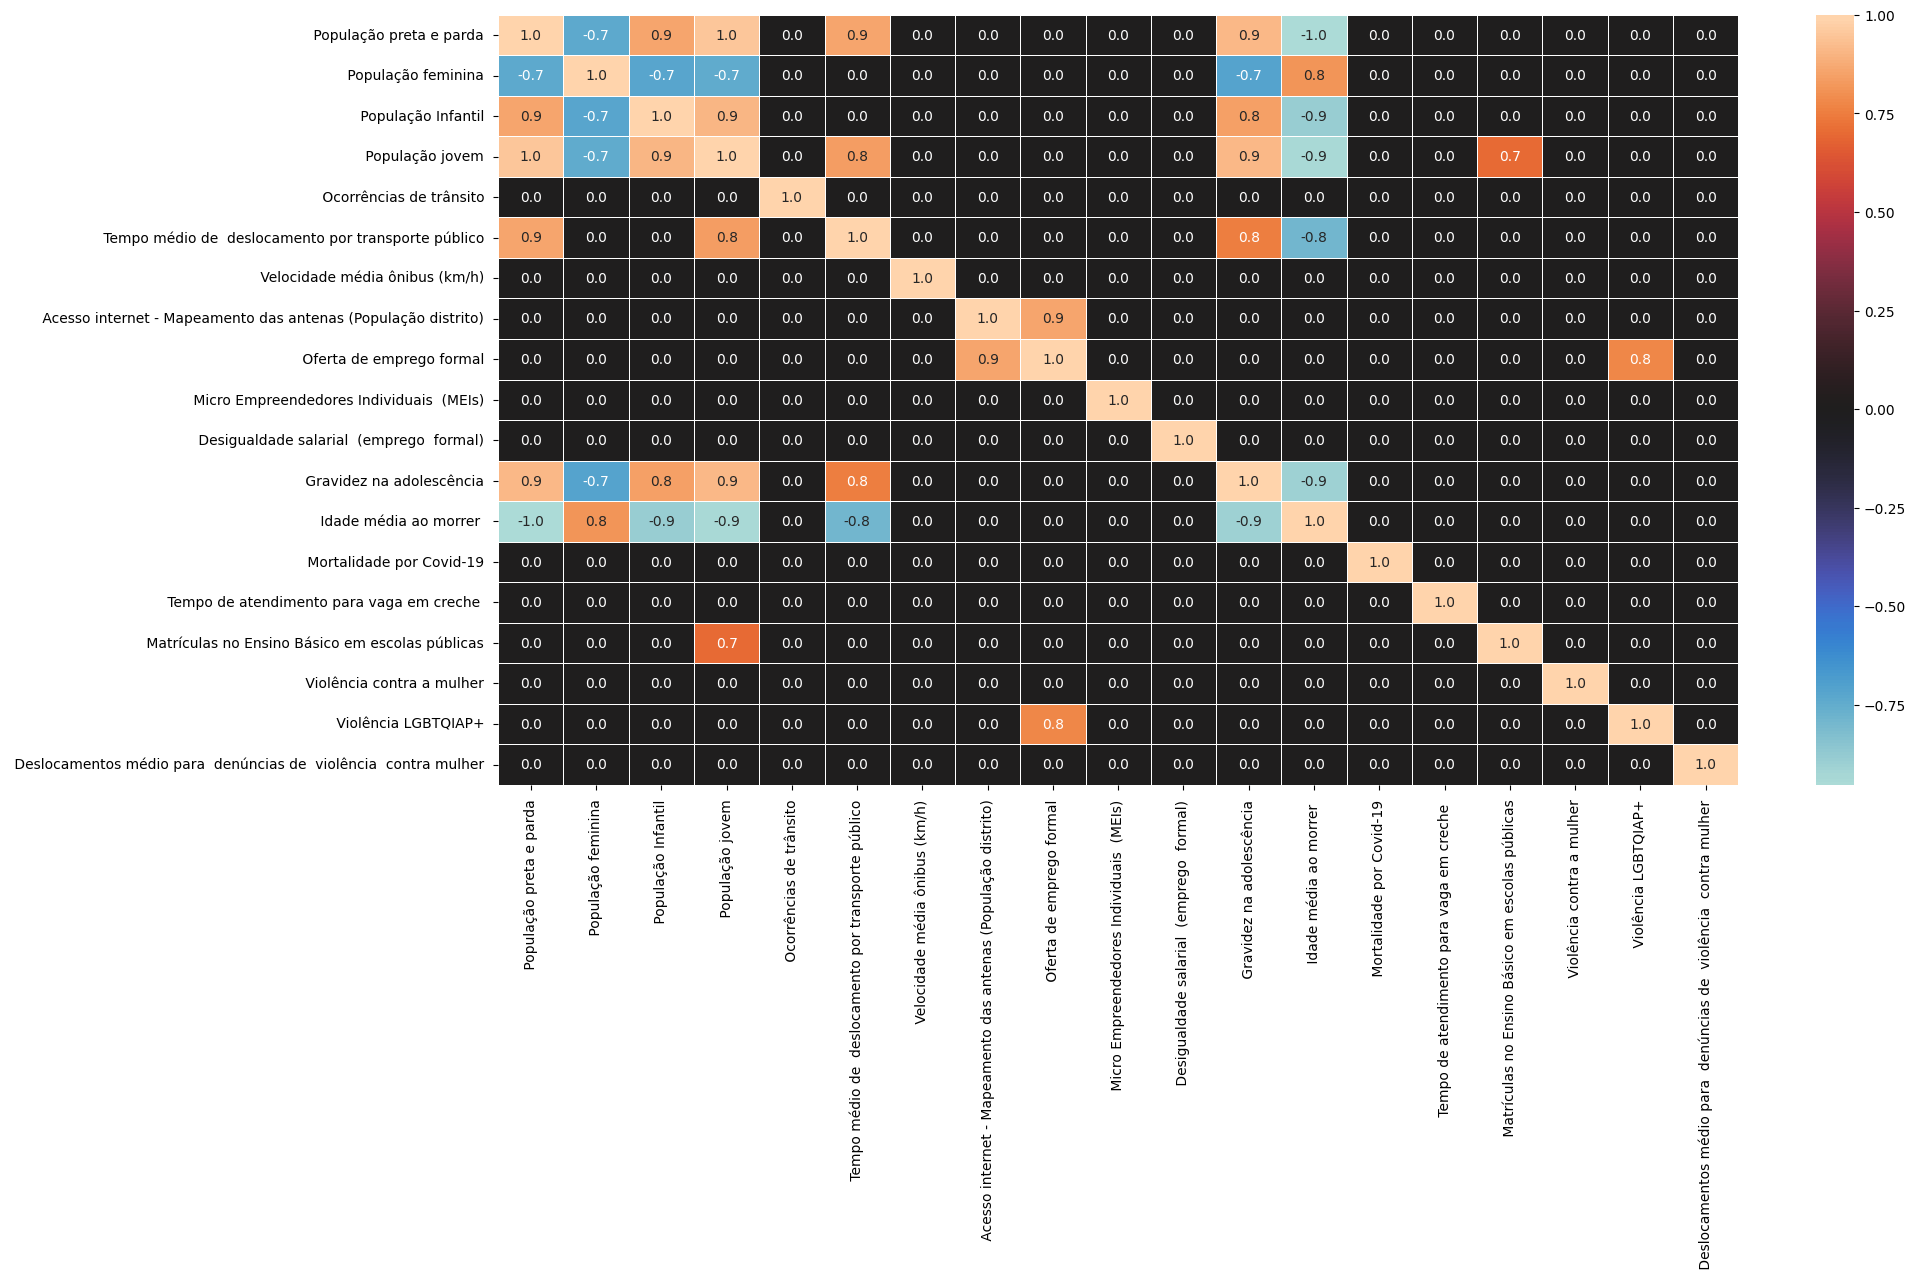

In [77]:
correlation = correlation.applymap(lambda x: x if(x >= 0.7 or x <= -0.7)  else 0)
fig, ax = plt.subplots(figsize=(20, 10))
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6, center=0)
plot

## Análise de correlação entre o Mapa da Desigualdade e o Participe+

In [78]:
desigualdade_subprefeitura_dataset_url = 'https://raw.githubusercontent.com/iwamotoraphael/participacao-politica/main/arquivos%20de%20dados/mapa-da-desigualdade-subprefeitura.csv'
desigualdade_subprefeitura_data = pd.read_csv(desigualdade_subprefeitura_dataset_url, sep=';', on_bad_lines='skip', encoding = "ISO-8859-1")

In [79]:
def count_propostas_viaveis(nome_da_subprefeitura: str) -> int:
  subprefeitura_data = data[data['Subprefeitura'] == nome_da_subprefeitura]

  # Filtrar as propostas que têm viabilidade igual a "Viável"
  propostas_viaveis = subprefeitura_data[subprefeitura_data['Viabilidade'] == 'Viável']

  # Calcular o número de propostas viáveis
  return len(propostas_viaveis)

In [80]:
subprefeituras = [
  'Aricanduva/Formosa/Carrão',
  'Butantã',
  'Campo Limpo',
  'Capela do Socorro',
  'Casa Verde',
  'Cidade Ademar',
  'Cidade Tiradentes',
  'Ermelino Matarazzo',
  'Freguesia/Brasilândia',
  'Guaianases', 'Ipiranga',
  'Itaim Paulista', 'Itaquera',
  'Jabaquara',
  'Jaçanã/Tremembé',
  'Lapa',
  "M'Boi Mirim",
  'Mooca',
  'Parelheiros',
  'Penha',
  'Perus',
  'Pinheiros',
  'Pirituba/Jaraguá',
  'Santana/Tucuruvi',
  'Santo Amaro',
  'São Mateus',
  'São Miguel',
  'Sapopemba',
  'Sé',
  'Vila Maria/Vila Guilherme',
  'Vila Mariana',
  'Vila Prudente'
]

participacao_subprefeitura_data = []

for s in subprefeituras:

  try:
    propostas_por_habitante = df_subprefeituras_propostas.loc[df_subprefeituras_propostas['Subprefeitura'] == s, 'Proporção de Propostas'].iloc[0]
  except:
    propostas_por_habitante = 0

  dado_desigualdade = {
      'SUBPREFEITURA' : s,
      'Propostas por habitante' : propostas_por_habitante,
      'Propostas viáveis' : count_propostas_viaveis(s)
  }
  participacao_subprefeitura_data.append(dado_desigualdade)

participacao_subprefeitura_data = pd.DataFrame(participacao_subprefeitura_data)
print(participacao_subprefeitura_data)

                SUBPREFEITURA  Propostas por habitante  Propostas viáveis
0   Aricanduva/Formosa/Carrão                 0.000519                  1
1                     Butantã                 0.000427                  3
2                 Campo Limpo                 0.000219                  2
3           Capela do Socorro                 0.000158                  3
4                  Casa Verde                 0.000656                  1
5               Cidade Ademar                 0.000139                  2
6           Cidade Tiradentes                 0.000270                  3
7          Ermelino Matarazzo                 0.000270                  2
8       Freguesia/Brasilândia                 0.000128                  3
9                  Guaianases                 0.000182                  5
10                   Ipiranga                 0.000198                  3
11             Itaim Paulista                 0.000346                  2
12                   Itaquera         

In [81]:
participacao_subprefeitura_data = participacao_subprefeitura_data.merge(desigualdade_subprefeitura_data, on='SUBPREFEITURA')
participacao_subprefeitura_data = participacao_subprefeitura_data.drop('SUBPREFEITURA', axis=1)
display(participacao_subprefeitura_data)

,Propostas por habitante,Propostas viáveis,População total,População preta e parda,População feminina,População Infantil,População jovem,População em situação de rua,Favelas,Habitações de Interesse Social (HIS) Licenciadas,...,Violência racial,Violência contra a mulher,Violência LGBTQIAP+,Deslocamentos médio para denúncias de violência contra mulher,Feminicídio,Mortes por intervenção policial,Homicídios,Homicídios de jovens,Agressões por intervenção policial,Emissão de poluentes atmosféricos por área (kg/km²/dia)
0,0.000427,3,461445,0.311183,0.061446,0.094514,0.386906,263,14.020000,33892,...,1.949737,217.215619,5.665929,4.220000,0.562659,2.980000,7.586504,17.066612,0.282507,0.234000
1,0.000219,2,694892,0.489256,0.172651,0.098336,0.439359,348,25.166667,11640,...,1.294385,210.710396,6.040413,5.900000,0.542388,2.733333,10.661249,24.381794,0.228332,0.323333
2,0.000158,3,632396,0.511562,0.000000,0.102238,0.446730,340,9.466667,7884,...,0.569351,223.794523,3.014527,10.966667,0.938582,1.533333,7.568345,12.750646,0.747578,0.193333
3,0.000656,1,312495,0.367171,0.146892,0.097285,0.407152,539,9.466667,4910,...,1.569230,239.747616,6.403215,3.733333,0.289968,1.633333,8.017104,15.806604,0.093996,0.270000
4,0.000139,2,449606,0.508672,0.334680,0.098833,0.435059,193,17.150000,1465,...,0.713546,214.427740,1.110961,10.050000,0.791610,2.050000,7.336130,16.094857,0.136130,0.275000
5,0.000270,3,237872,0.560999,0.521999,0.105998,0.485000,134,4.100000,26072,...,0.710000,208.800000,2.500000,8.500000,0.800000,3.000000,16.000000,36.300000,0.000000,0.290000
6,0.000270,2,208675,0.396516,0.295646,0.088851,0.403402,346,6.000000,2075,...,2.351190,279.526648,3.341498,4.000000,0.456599,2.000000,6.741498,8.510343,1.255647,0.340000
7,0.000182,5,285993,0.543863,0.199117,0.108615,0.473368,391,5.000000,10529,...,0.696758,252.265362,2.782581,7.300000,0.361411,4.050000,12.598347,28.439476,0.585887,0.300000
8,0.000198,3,491151,0.279922,0.122123,0.081002,0.365474,544,11.133333,12729,...,1.466840,230.362568,2.457006,7.900000,0.628839,2.433333,8.112645,16.828770,0.300000,0.176667
9,0.000346,2,390254,0.533781,0.313383,0.100235,0.456075,186,6.400000,6762,...,0.486299,238.888172,5.860499,8.300000,0.460499,1.800000,5.109976,9.014322,0.639501,0.310000


<Axes: >

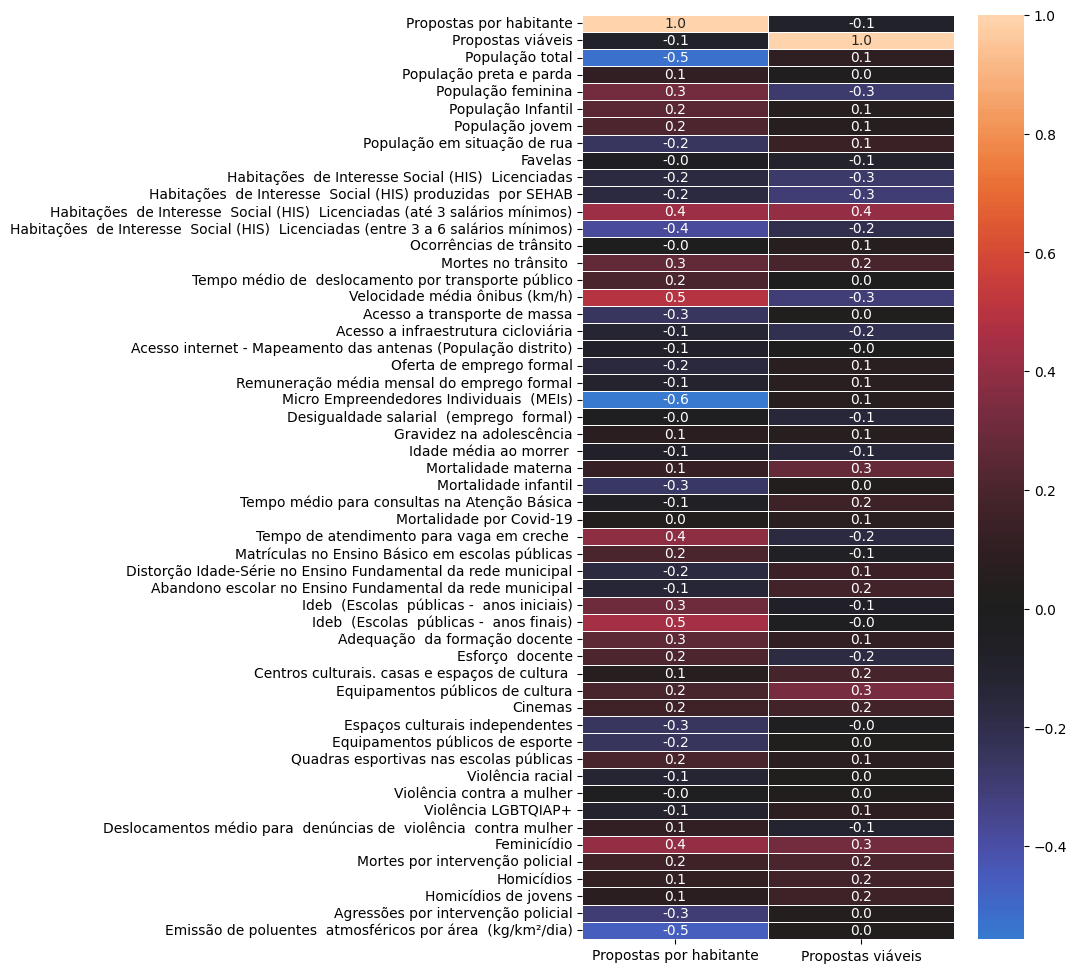

In [82]:
correlation = participacao_subprefeitura_data.corr()
fig, ax = plt.subplots(figsize=(6, 12))
plot = sn.heatmap(correlation[['Propostas por habitante','Propostas viáveis']], annot = True, fmt=".1f", linewidths=.6, center=0)
plot